# Concrete Strength Prediction: 

*A Regression Project*

<br>


# 1.Problem Statement


*Objective:*
To predict the strength of concrete (in MPa) based on its ingredient quantities and age using machine learning models.

# 2.Import Libraries.

Here’s a clean standard set of Python libraries:

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [75]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor


# 3.Load dataset.

Here’s the clean code to load your uploaded concrete_Data.csv file:

In [77]:
df = pd.read_csv('concrete_Data.csv')
df.head()

cement   slag    ash  water  superplastic  coarseagg  fineagg  age  \
0   141.3  212.0    0.0  203.5           0.0      971.8    748.5   28   
1   168.9   42.2  124.3  158.3          10.8     1080.8    796.2   14   
2   250.0    0.0   95.7  187.4           5.5      956.9    861.2   28   
3   266.0  114.0    0.0  228.0           0.0      932.0    670.0   28   
4   154.8  183.4    0.0  193.3           9.1     1047.4    696.7   28   

   strength  
0     29.89  
1     23.51  
2     29.22  
3     45.85  
4     18.29

# 4.Data Cleaning!

🔹 Handle Missing Values

In [7]:
print(df.isnull().sum())
df = df.dropna()  

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64


🔹 Convert Data Types

In [8]:
print(df.dtypes)

cement          float64
slag            float64
ash             float64
water           float64
superplastic    float64
coarseagg       float64
fineagg         float64
age               int64
strength        float64
dtype: object


🔹 Remove Duplicates

In [9]:
print(f"Duplicate rows: {df.duplicated().sum()}")
df = df.drop_duplicates()

Duplicate rows: 25


# 5.Exploratory Data Analysis (EDA)

## ○ Visualize distributions

## i)Univariate Analysis

Univariate analysis focuses on a single variable at a time.

<Figure size 2000x1500 with 0 Axes>

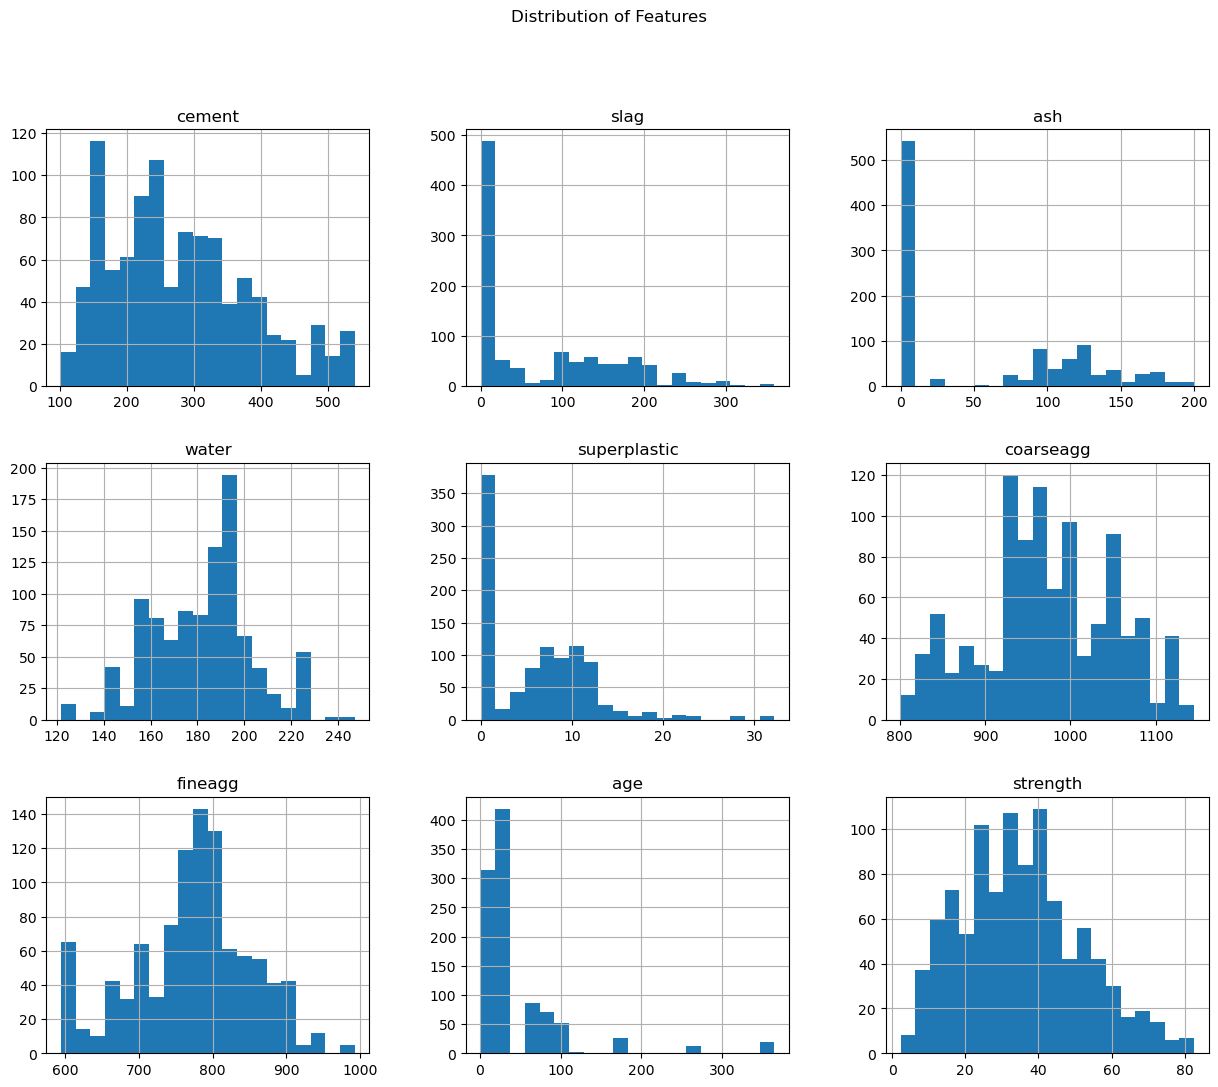

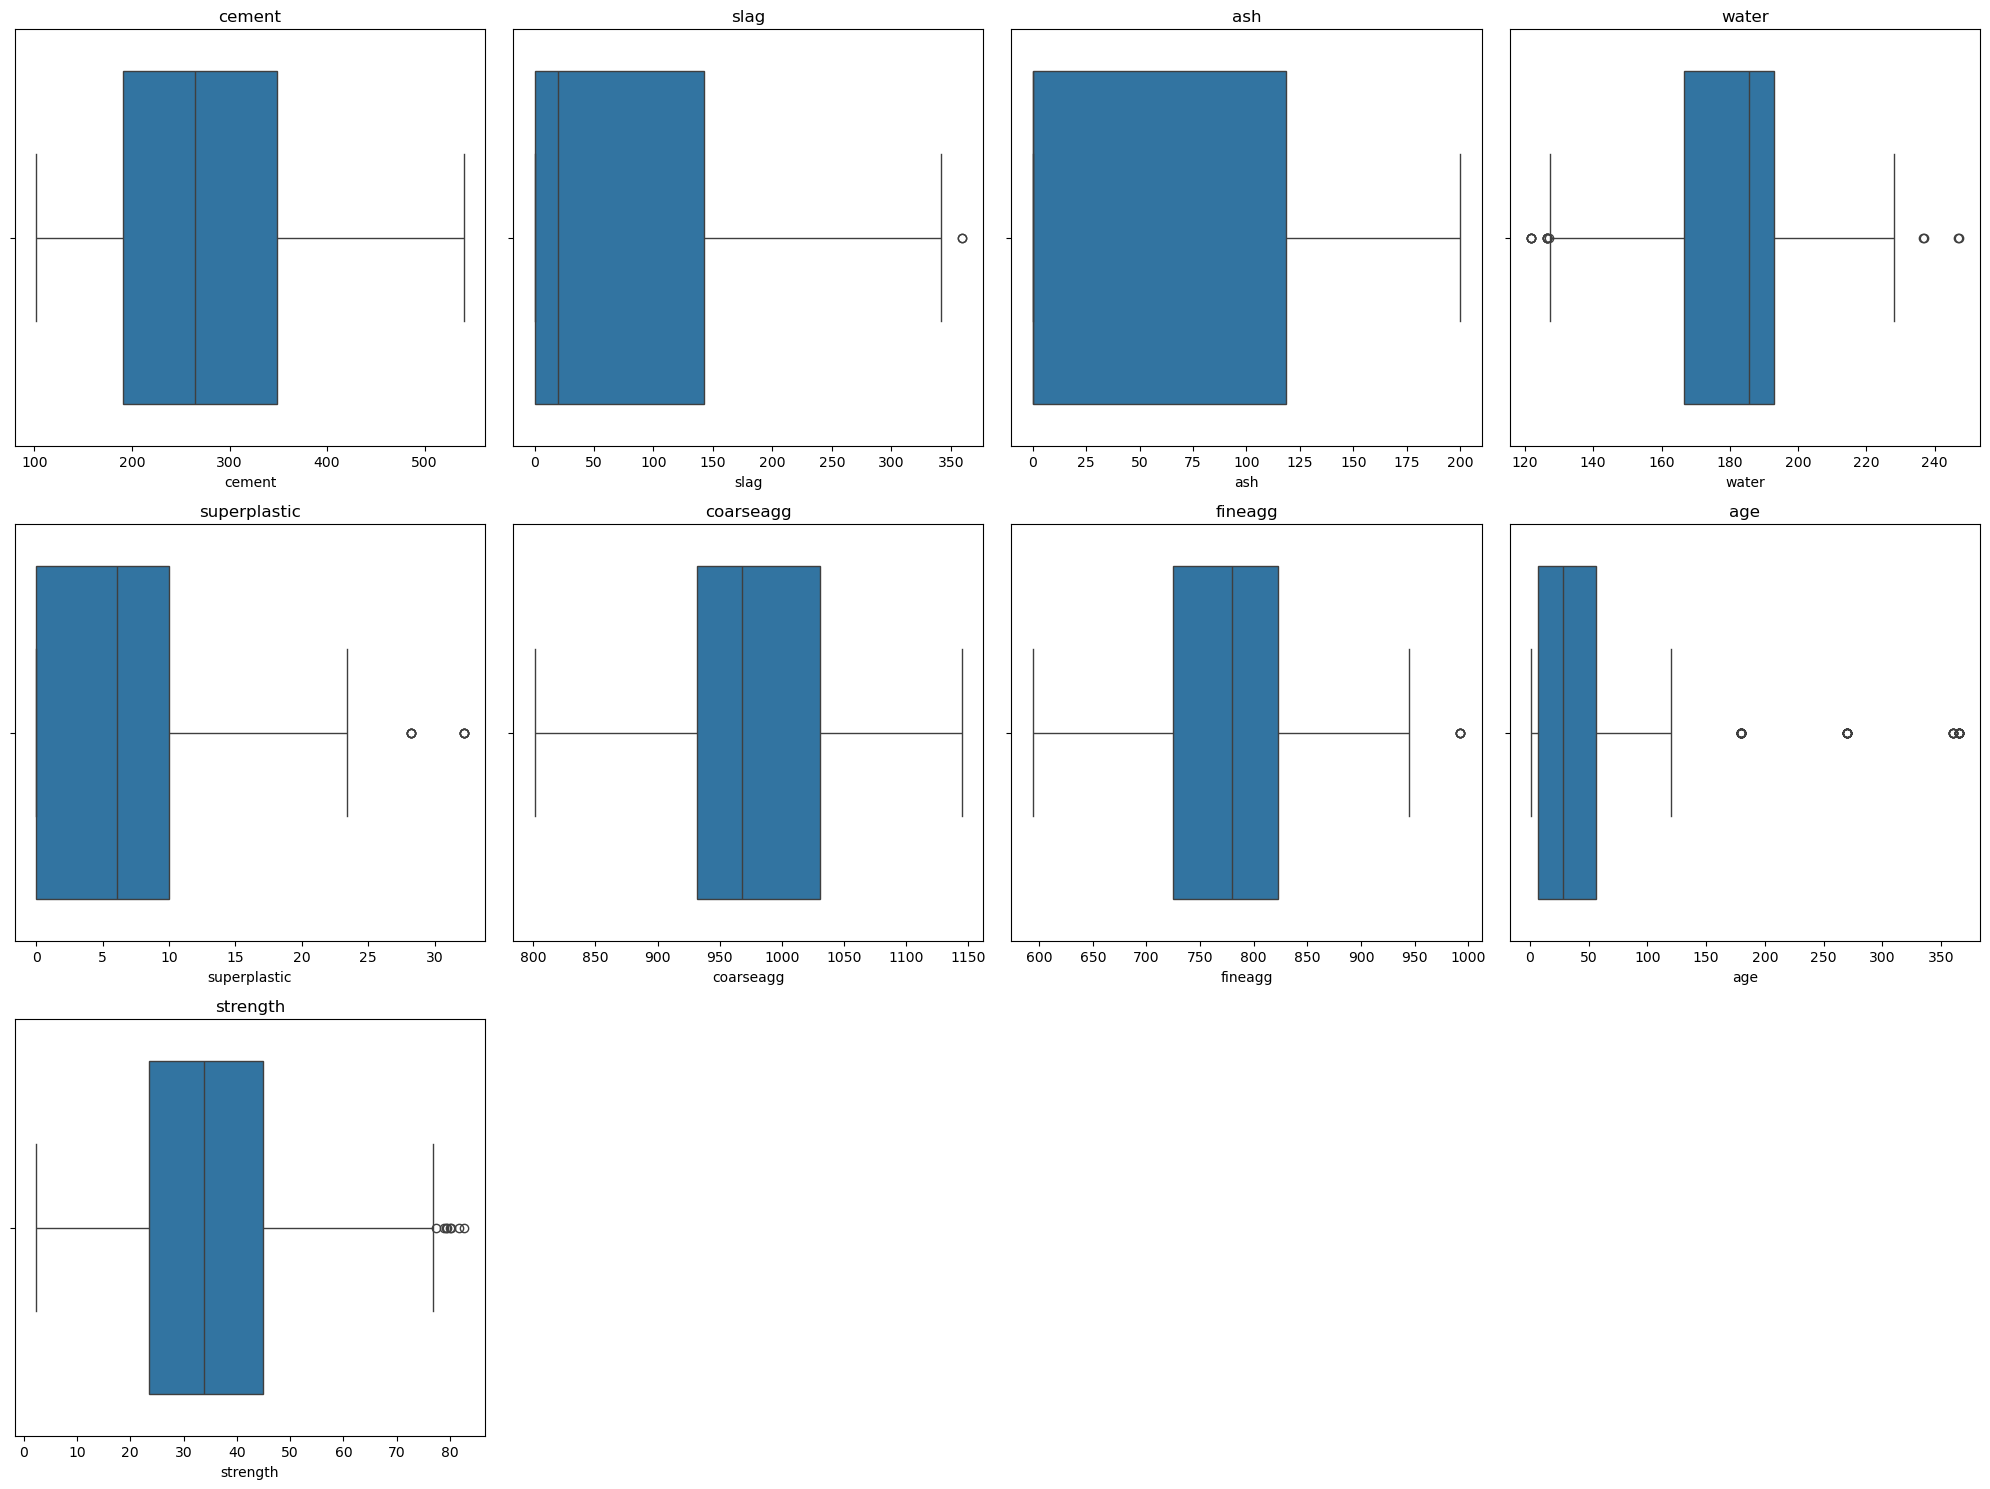

In [10]:
plt.figure(figsize=(20, 15))
df.hist(bins=20, figsize=(15, 12))
plt.suptitle('Distribution of Features')
plt.show()
plt.figure(figsize=(20, 15))
for i, column in enumerate(df.columns):
    plt.subplot(3, 4, i+1)
    sns.boxplot(x=df[column])
    plt.title(column)

plt.tight_layout()
plt.show()

## ii)Bivariate Analysis

Bivariate analysis looks at relationships between two variables. 

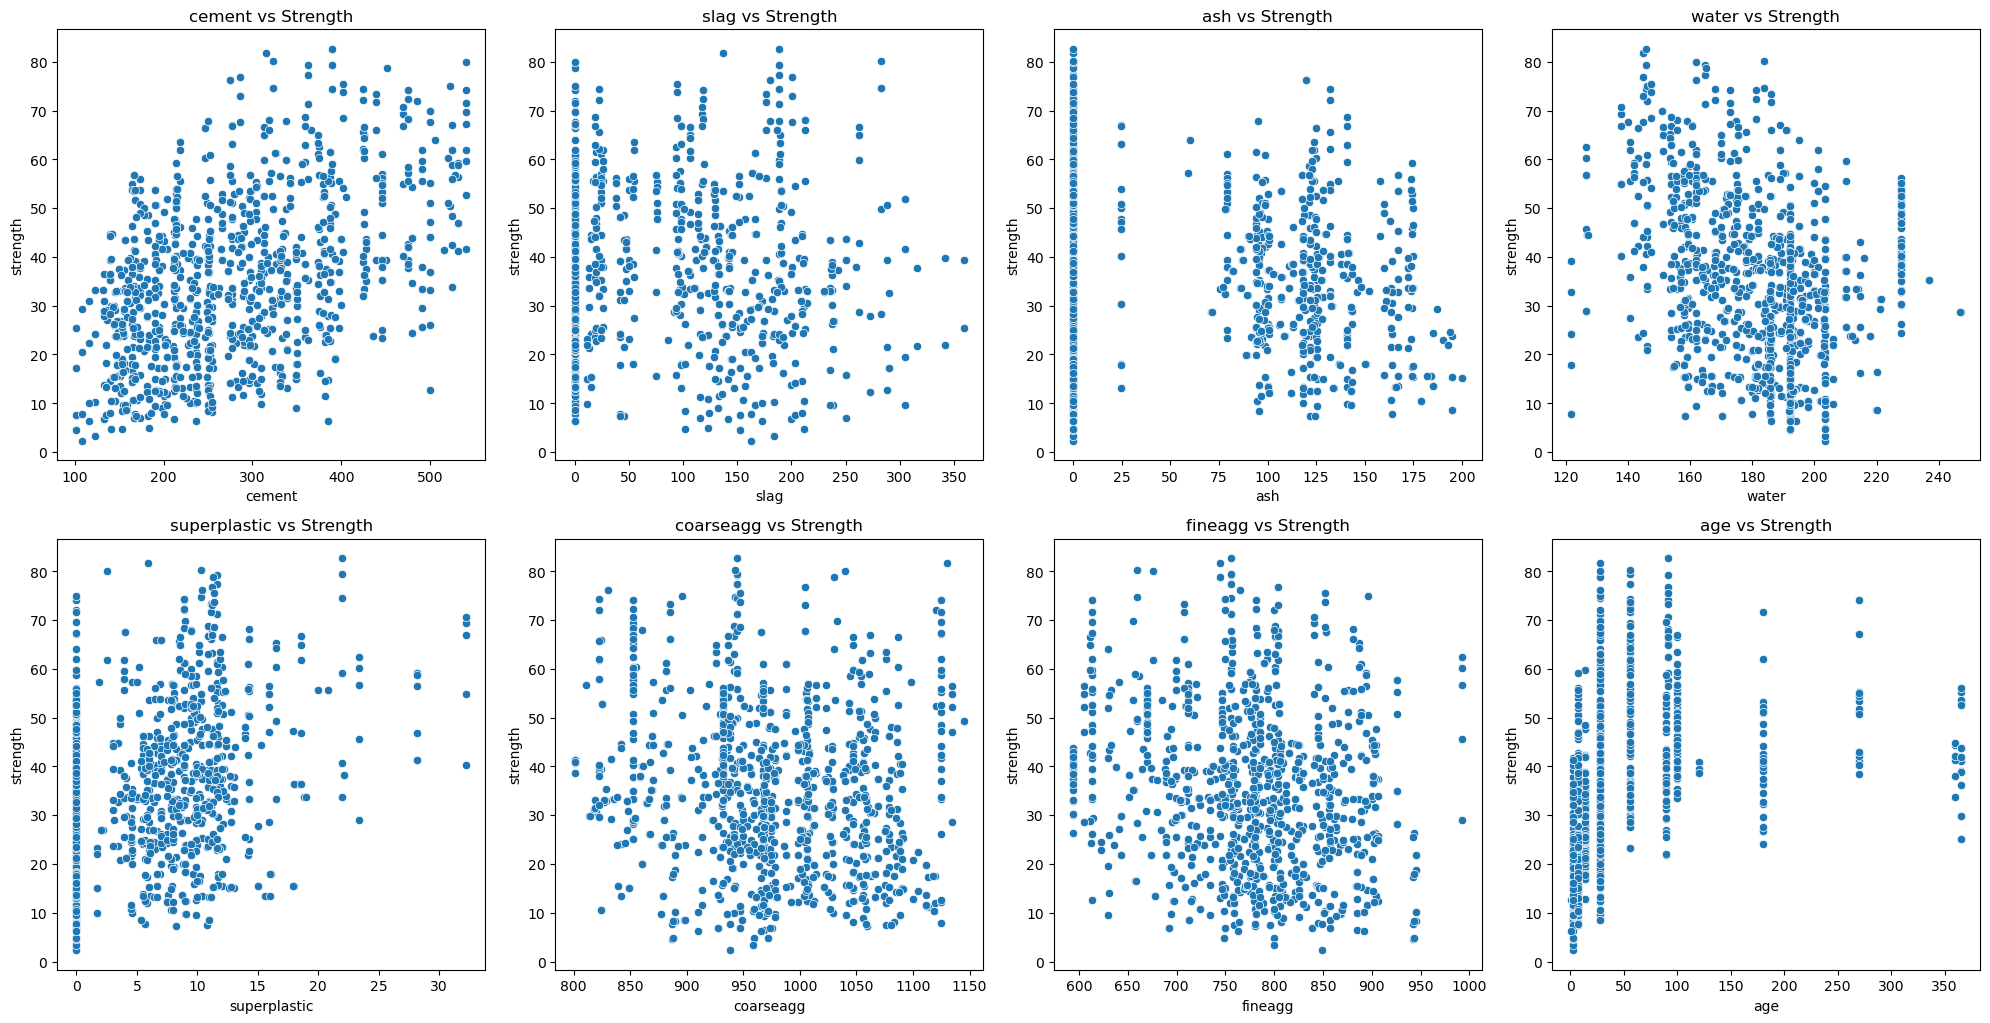

In [12]:
plt.figure(figsize=(20, 15))
for i, column in enumerate(df.columns[:-1]):  # Exclude target variable
    plt.subplot(3, 4, i+1)
    sns.scatterplot(x=df[column], y=df['strength'])
    plt.title(f'{column} vs Strength')

plt.tight_layout()
plt.show()

## Pairplot for selected features including the target

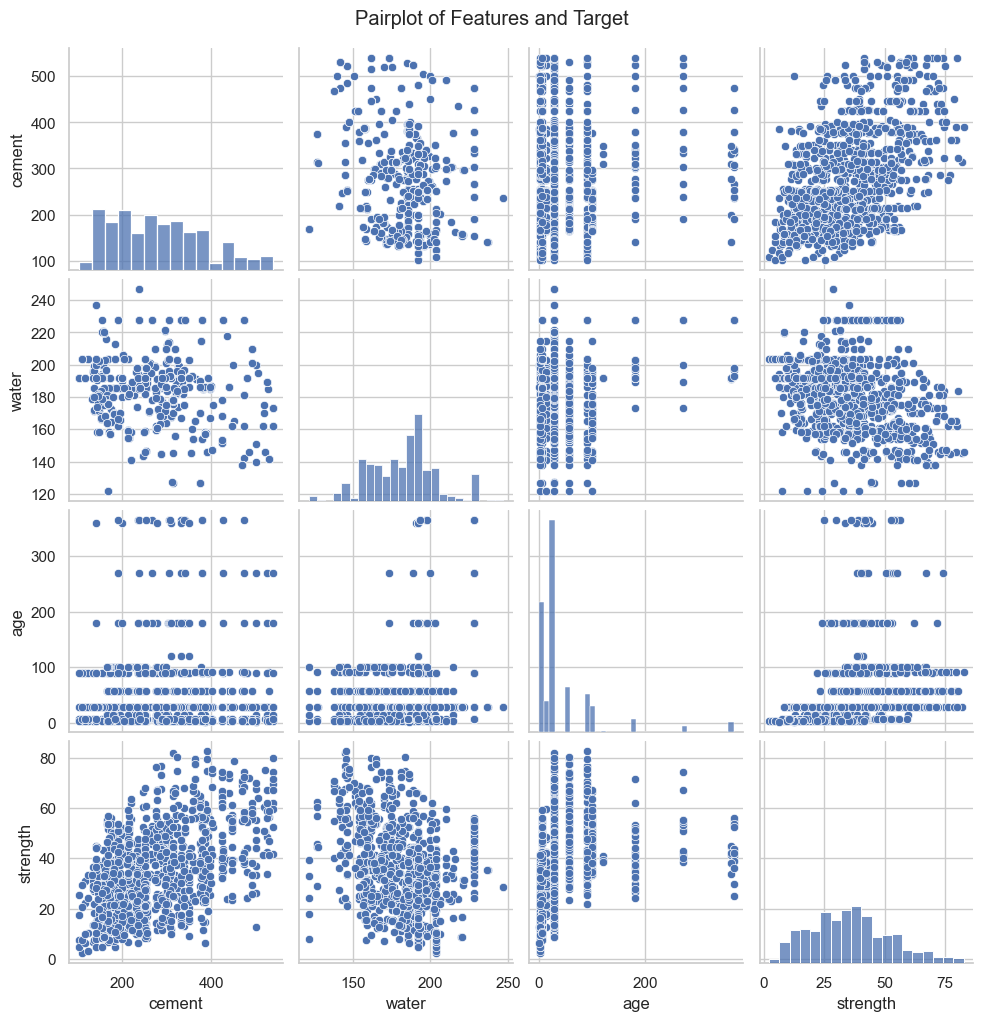

In [78]:
sns.pairplot(df[['cement', 'water', 'age', 'strength']])
plt.suptitle('Pairplot of Features and Target', y=1.02)
plt.show()

## iii)Multivariate Analysis

Multivariate analysis explores relationships between more than two variables. 

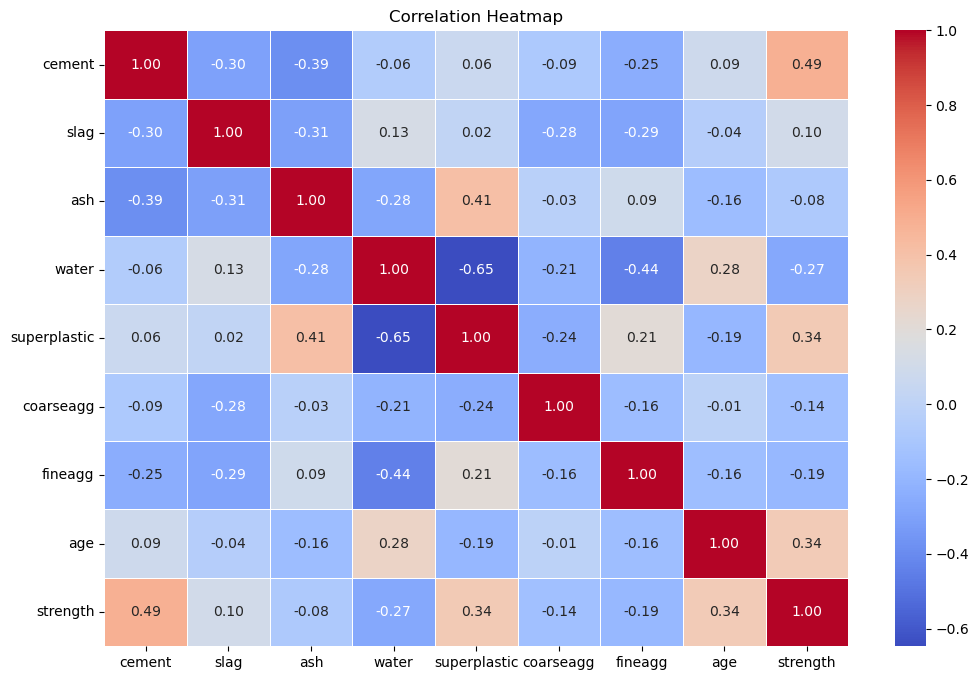

In [18]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

## Pairplot for the first few features to observe multivariate relationships

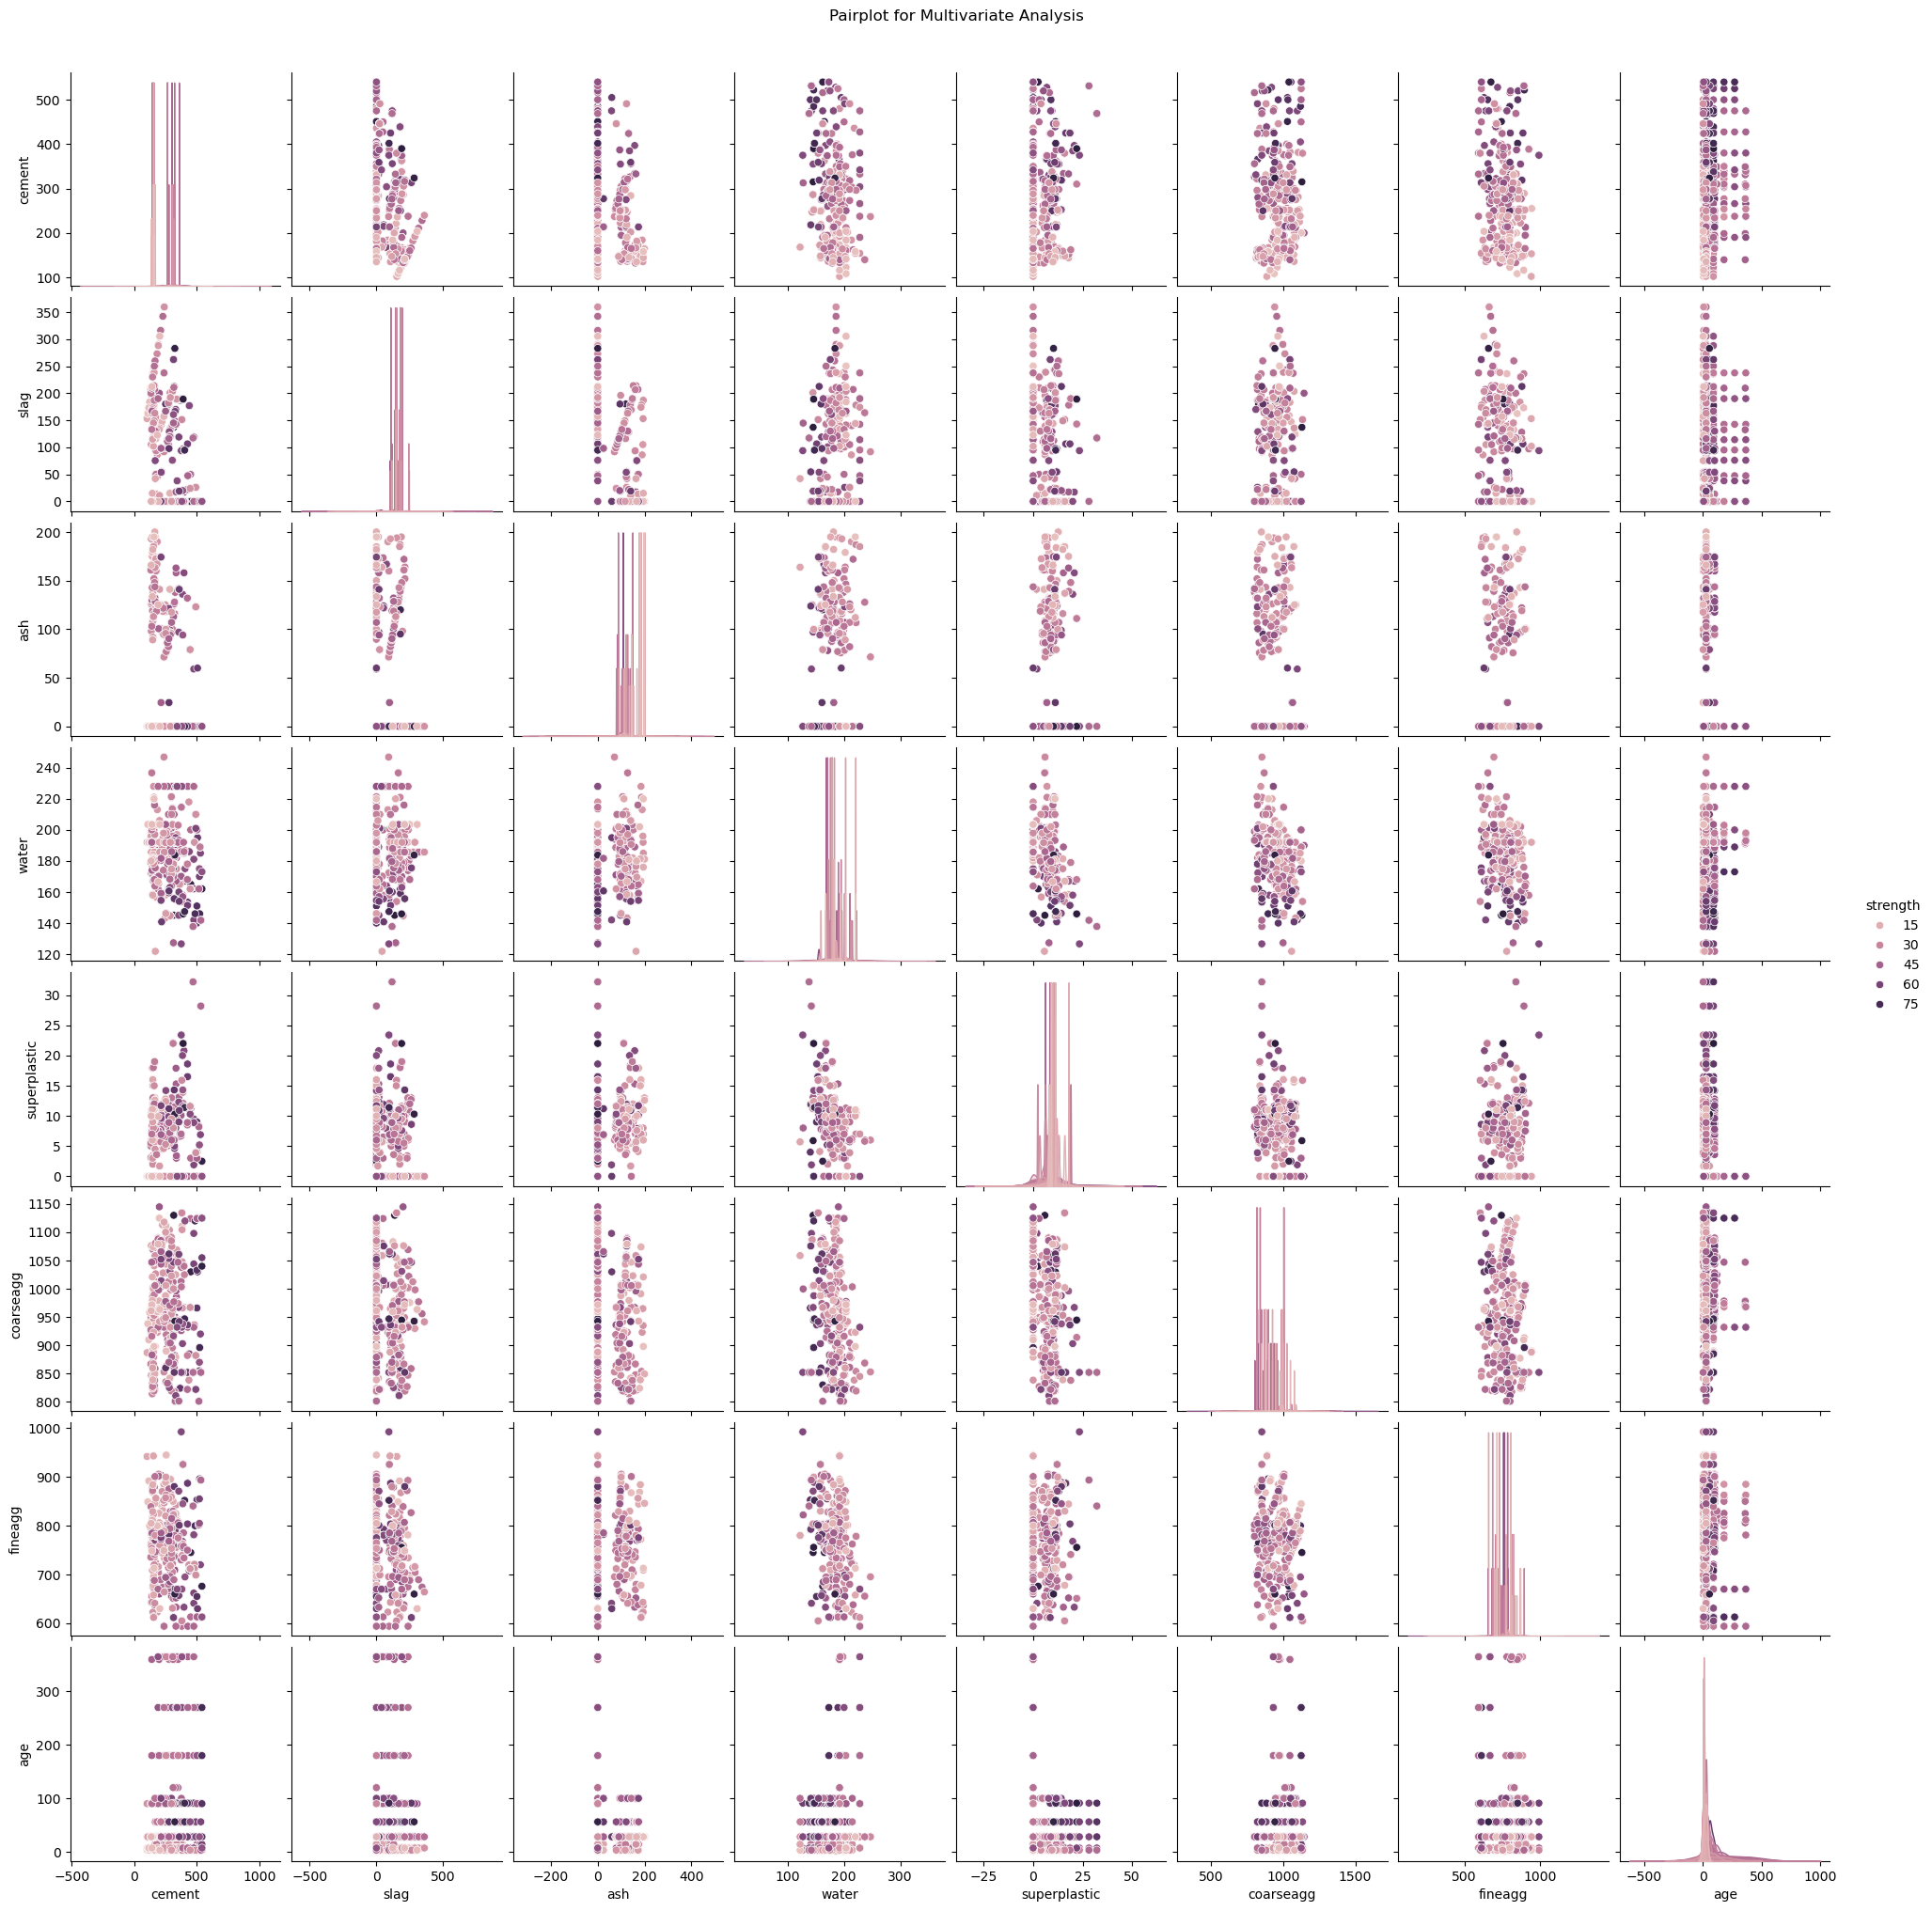

In [14]:
sns.pairplot(df, hue='strength')
plt.suptitle('Pairplot for Multivariate Analysis', y=1.02)
plt.show()

## ○ Correlation analysis

Correlation of each feature with the target (strength)

In [19]:
cor_target = df.corr()['strength'].sort_values(ascending=False)
print(cor_target)

strength        1.000000
cement          0.488283
superplastic    0.344209
age             0.337367
slag            0.103374
ash            -0.080648
coarseagg      -0.144717
fineagg        -0.186448
water          -0.269624
Name: strength, dtype: float64


 Heatmap of feature correlations with target

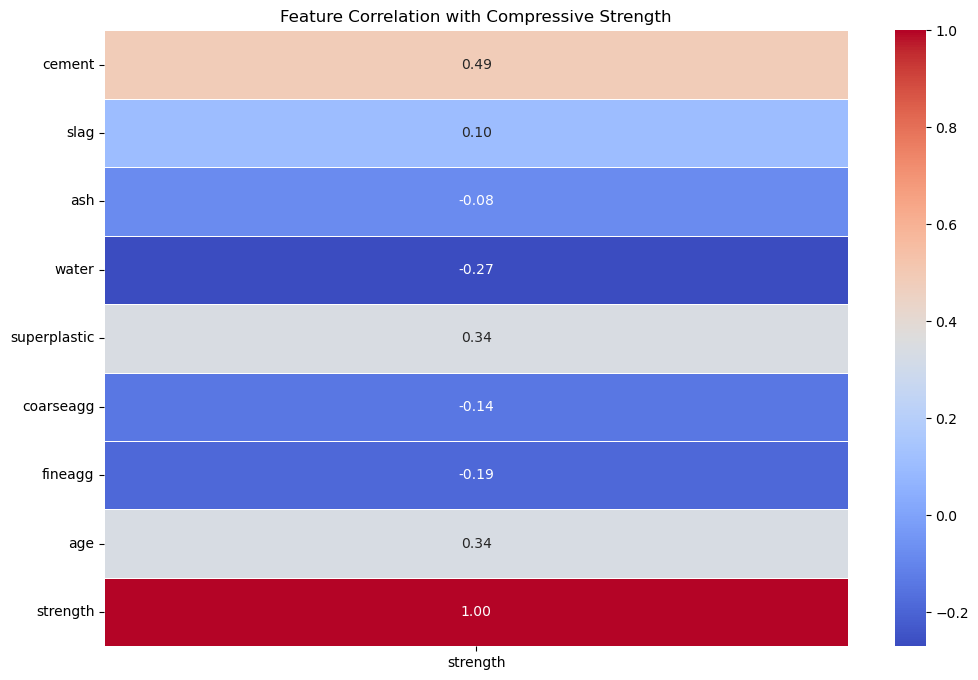

In [21]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix[['strength']], annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Feature Correlation with Compressive Strength')
plt.show()

## ○ Feature-target relationships

Visualize how each feature influences the target variable. Some features might have a stronger effect on strength, while others may be weaker.

 Regression plots for each feature vs the target

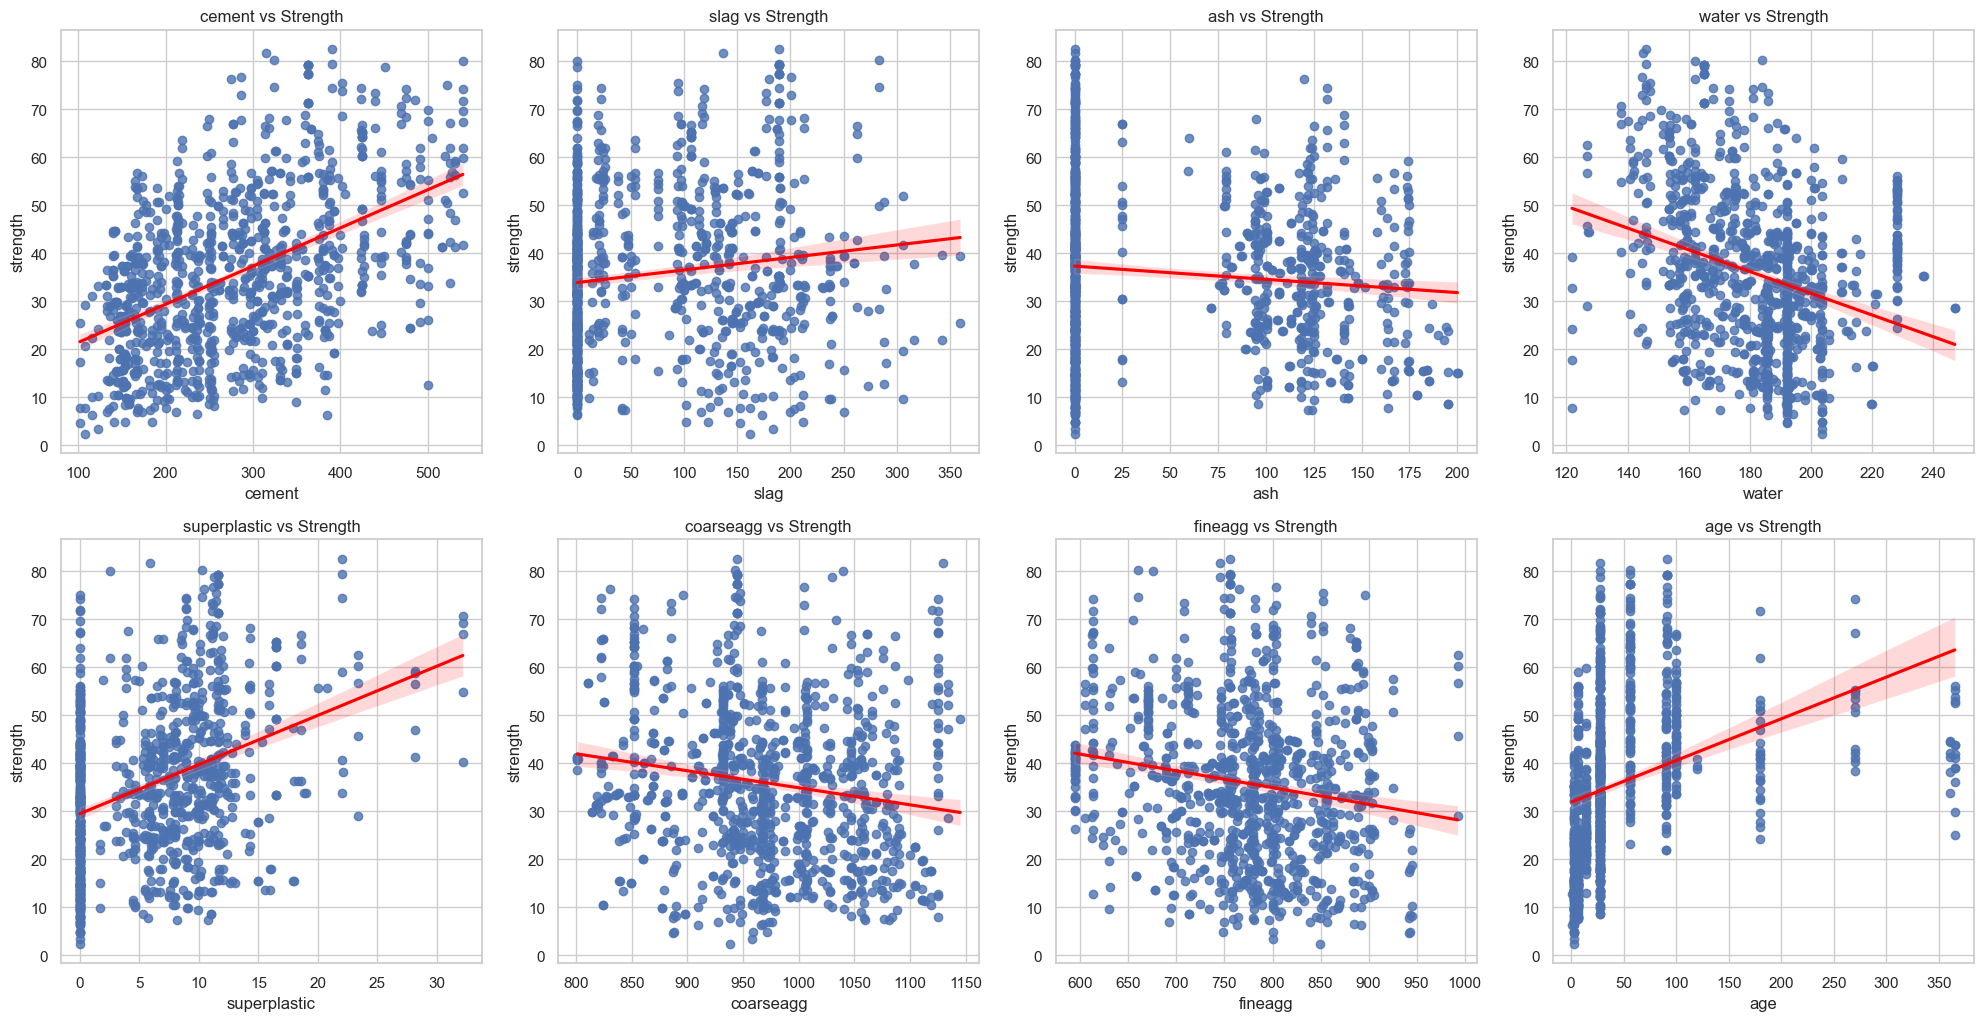

In [81]:
plt.figure(figsize=(20, 15))
for i, column in enumerate(df.columns[:-1]):  # Exclude target variable
    plt.subplot(3, 4, i+1)
    sns.regplot(x=df[column], y=df['strength'], line_kws={"color": "red"})
    plt.title(f'{column} vs Strength')
plt.tight_layout()
plt.show()

# 6.Outlier Detection using Boxplot

A boxplot visually displays the distribution of a dataset and helps identify outliers. Outliers are typically defined as values that lie outside the interquartile range (IQR), which is the range between the first quartile (25th percentile) and third quartile (75th percentile).

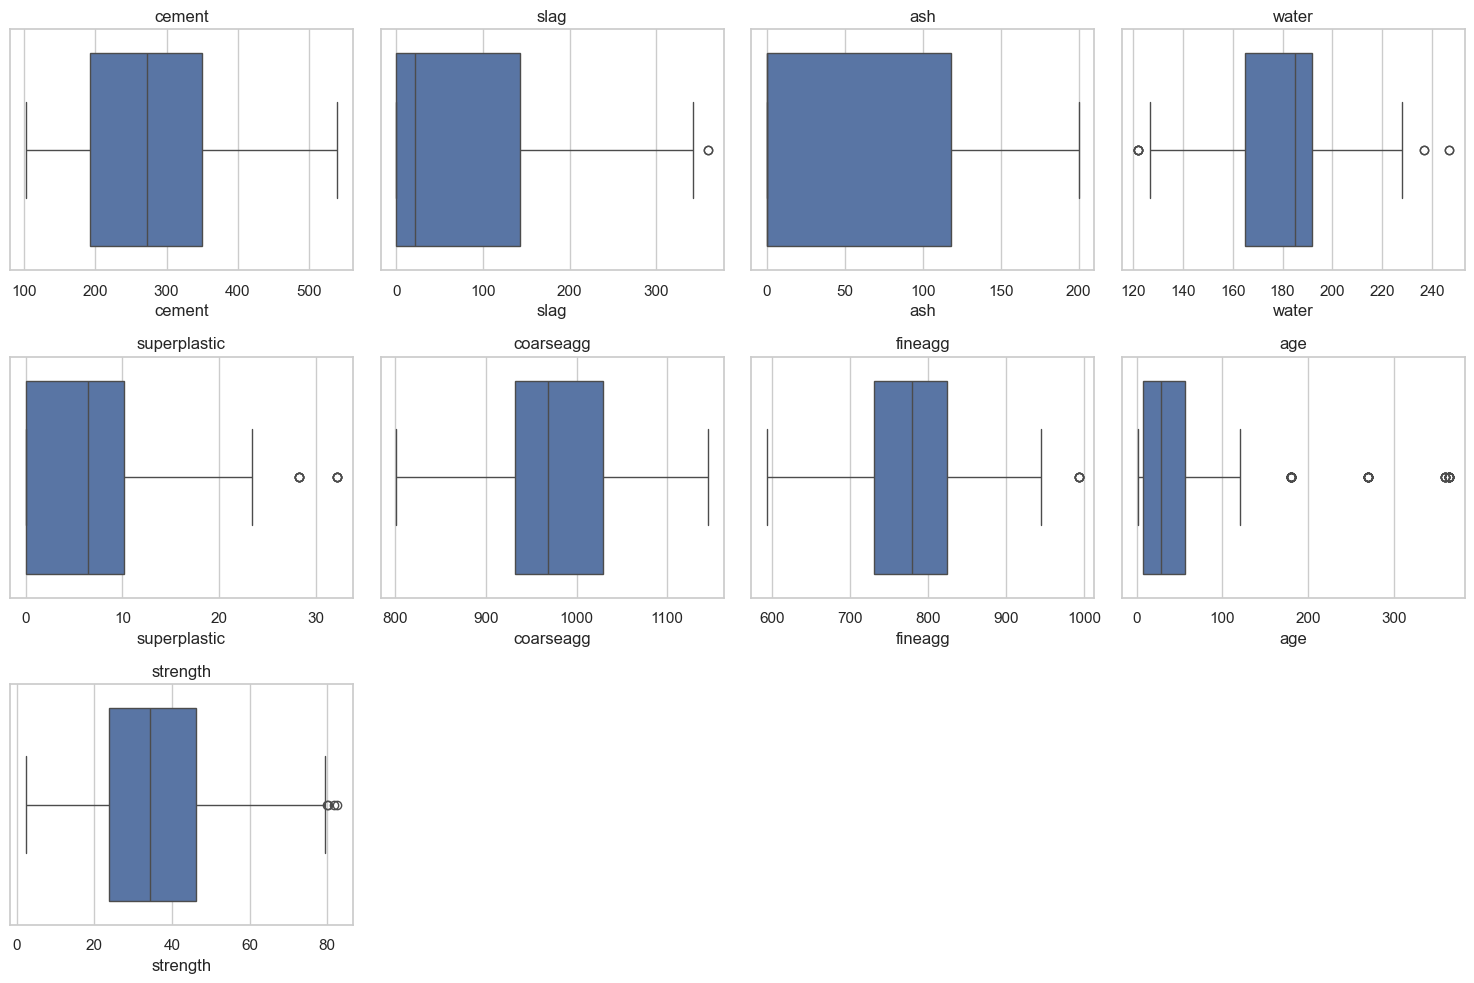

In [82]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(df.columns):
    plt.subplot(3, 4, i+1)
    sns.boxplot(x=df[column])
    plt.title(column)
plt.tight_layout()
plt.show()

## Remove Outliers

removing outliers that are far from the whiskers (e.g., beyond 1.5 * IQR).

In [83]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
filtered_data = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(f"Original data shape: {df.shape}")
print(f"Filtered data shape: {filtered_data.shape}")

Original data shape: (1030, 9)
Filtered data shape: (941, 9)


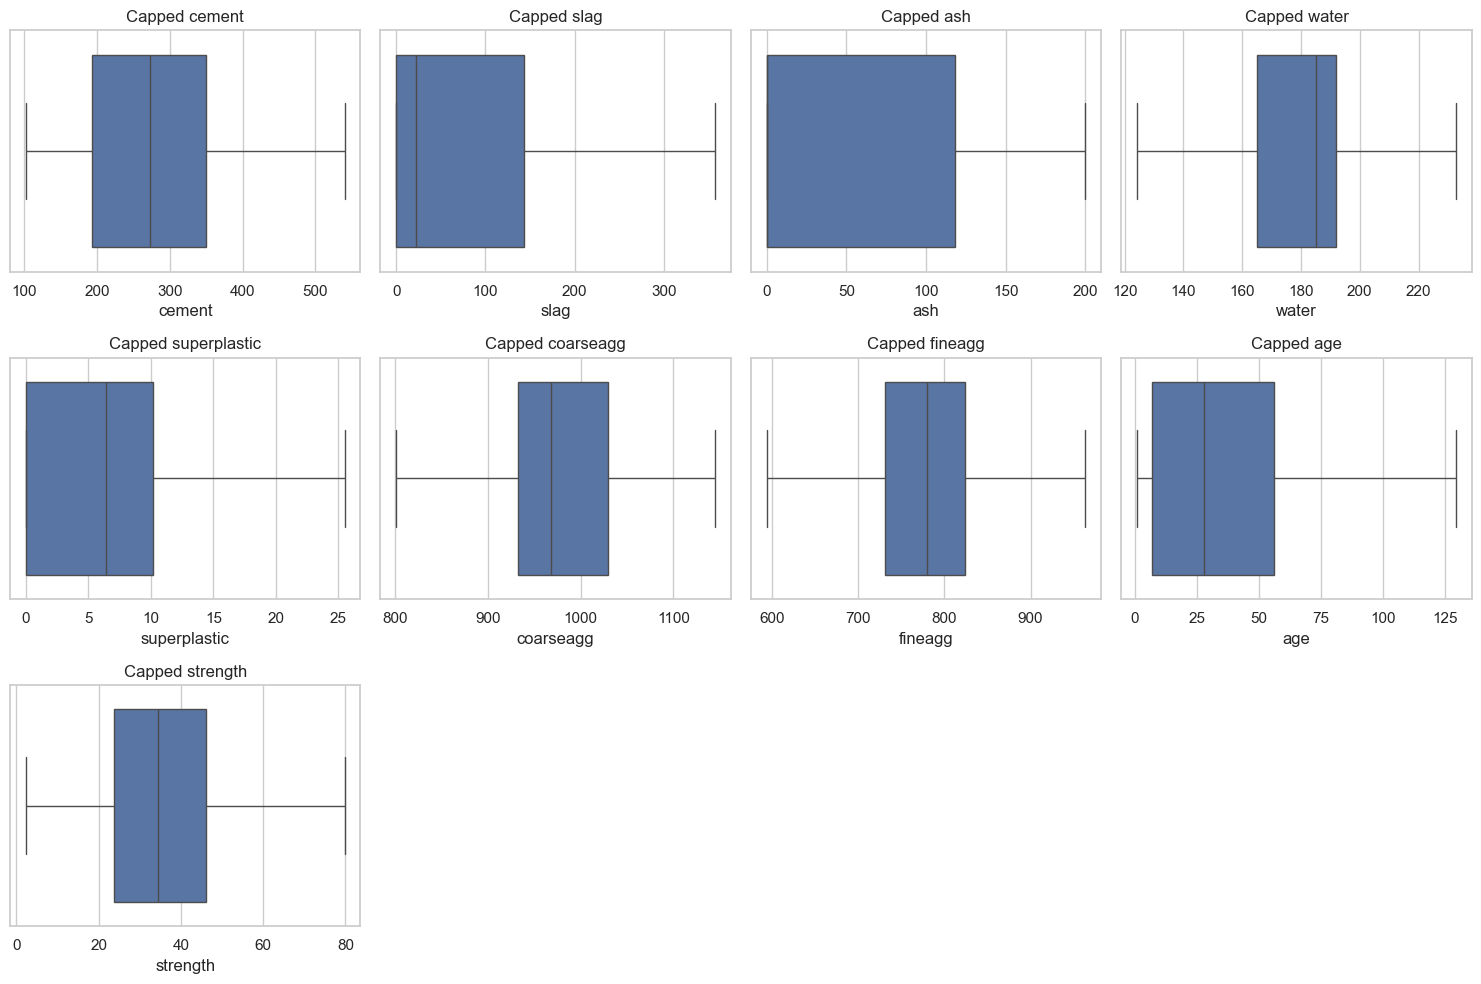

In [84]:
data_capped = df.copy()
for column in df.columns:
    data_capped[column] = df[column].clip(lower=Q1[column] - 1.5 * IQR[column], upper=Q3[column] + 1.5 * IQR[column])
plt.figure(figsize=(15, 10))
for i, column in enumerate(data_capped.columns):
    plt.subplot(3, 4, i+1)
    sns.boxplot(x=data_capped[column])
    plt.title(f'Capped {column}')
plt.tight_layout()
plt.show()


## Imputation (Replacing with Mean/Median)

Another approach is to replace outliers with the mean or median of the feature. This is useful when the outliers represent errors or extreme values that don't provide useful information.

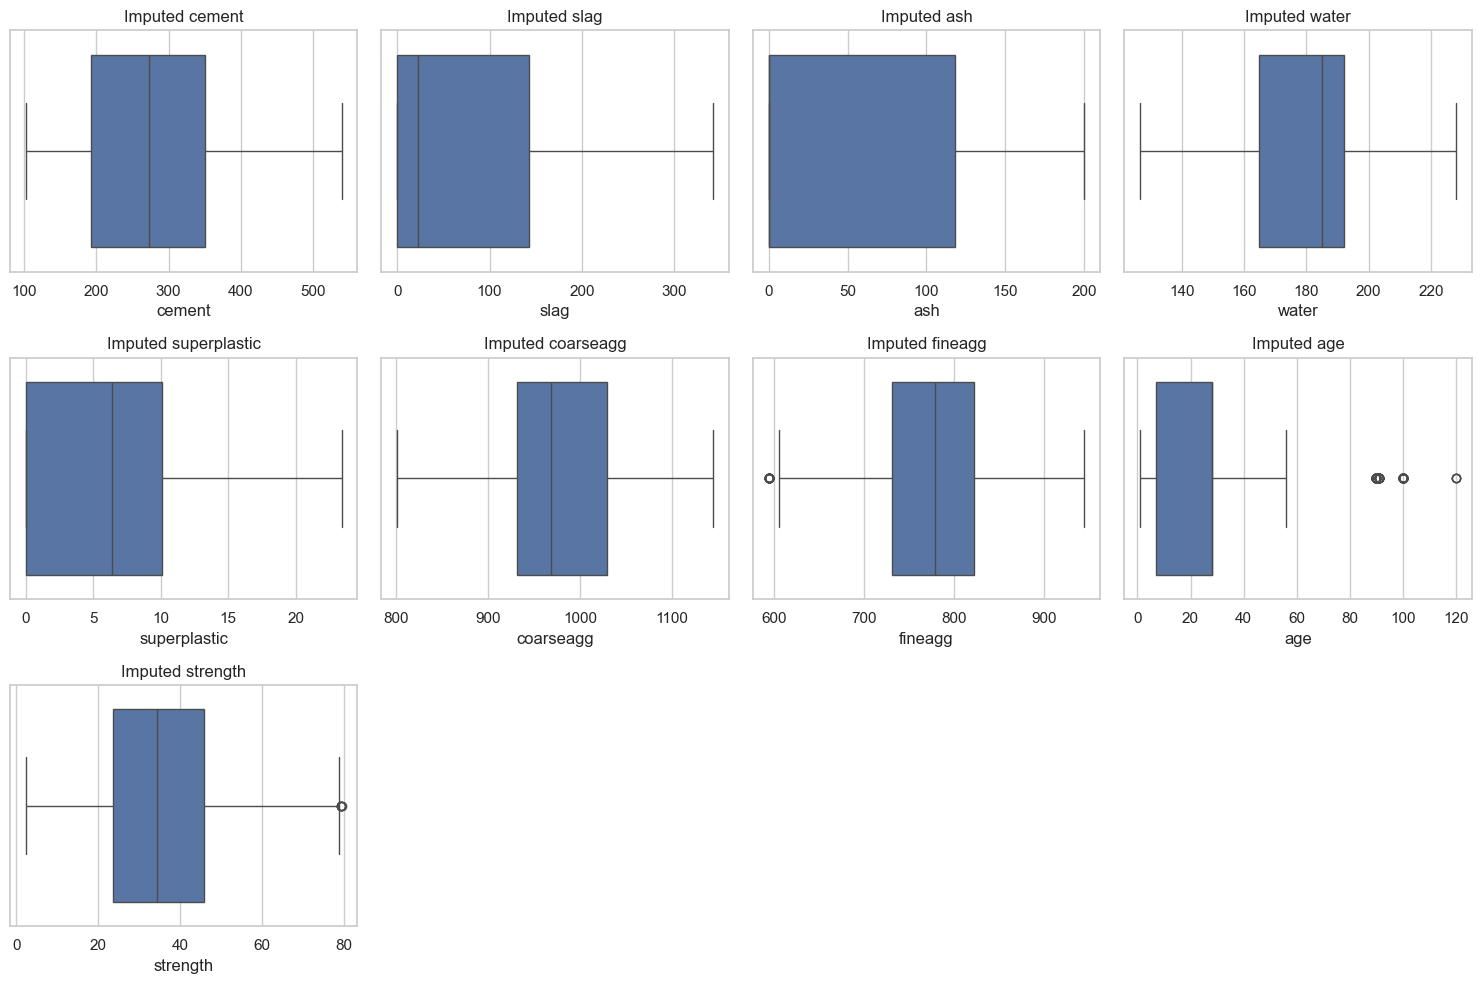

In [85]:
data_imputed = df.copy()
for column in df.columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    median_value = df[column].median()
    data_imputed[column] = df[column].apply(lambda x: median_value if x < lower_bound or x > upper_bound else x)
plt.figure(figsize=(15, 10))
for i, column in enumerate(data_imputed.columns):
    plt.subplot(3, 4, i+1)
    sns.boxplot(x=data_imputed[column])
    plt.title(f'Imputed {column}')
plt.tight_layout()
plt.show()


# 7. Check distributions & apply transformations (if needed)

## Skewness and Kurtosis

In [86]:
from scipy.stats import skew, kurtosis
skewness = df.apply(skew)
kurt = df.apply(kurtosis)
print(f"Skewness of each feature:\n{skewness}")
print(f"Kurtosis of each feature:\n{kurt}")

Skewness of each feature:
cement          0.508739
slag            0.799550
ash             0.536571
water           0.074520
superplastic    0.905881
coarseagg      -0.040161
fineagg        -0.252641
age             3.264415
strength        0.416370
dtype: float64
Kurtosis of each feature:
cement          -0.523948
slag            -0.511532
ash             -1.328125
water            0.115670
superplastic     1.398608
coarseagg       -0.601932
fineagg         -0.107501
age             12.104177
strength        -0.318024
dtype: float64


## Visualize Distributions

We can visualize the distributions to get a better sense of how skewed the features are.

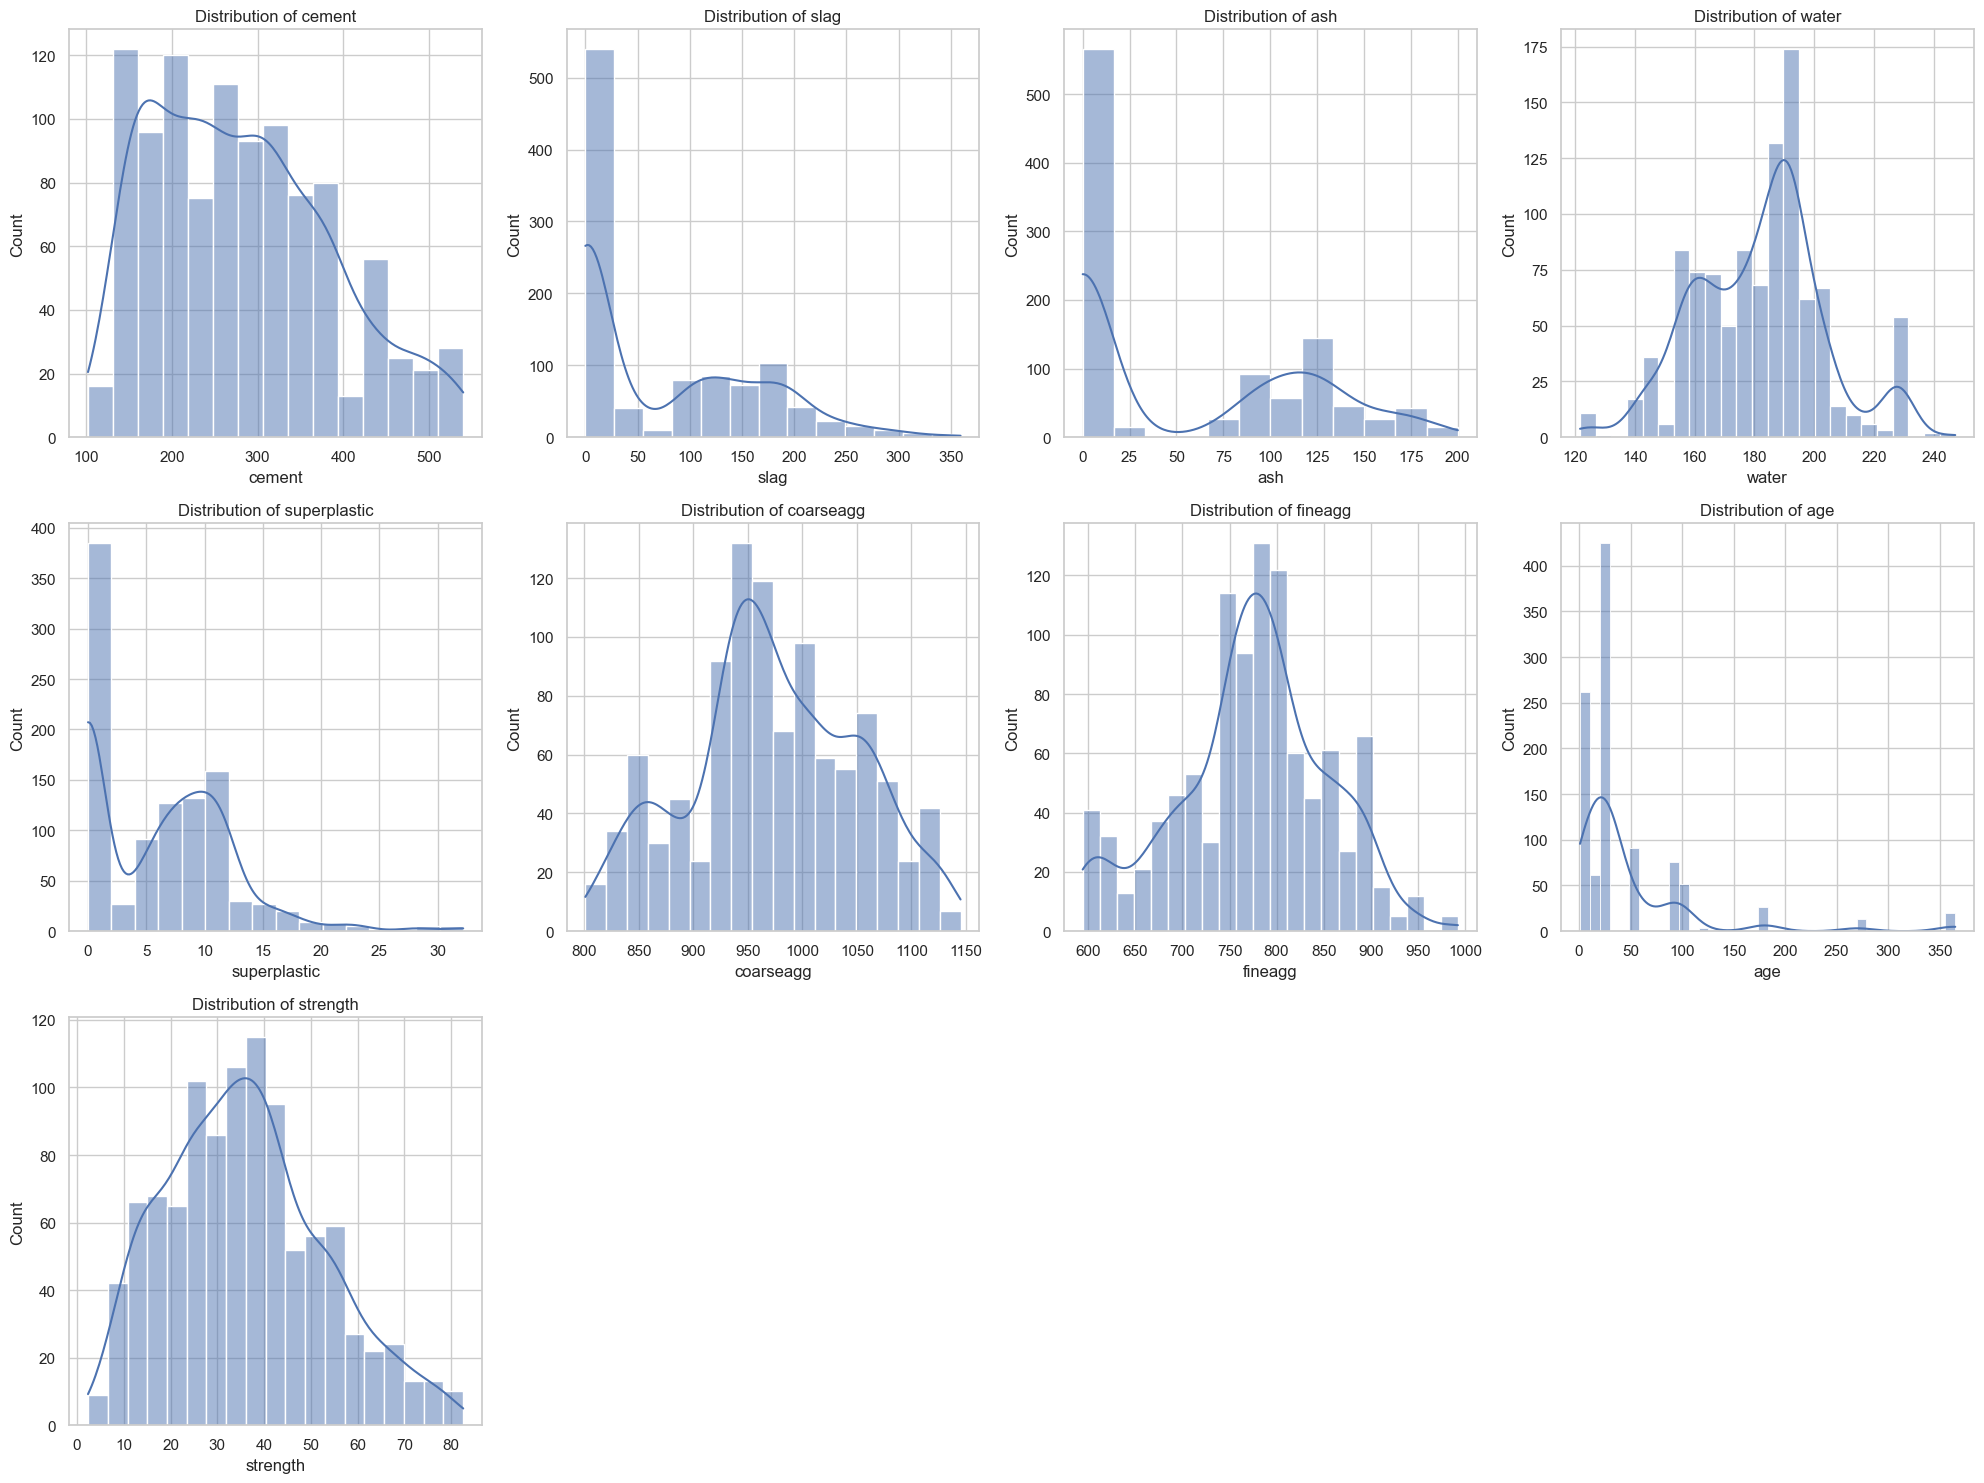

In [87]:
plt.figure(figsize=(20, 15))
for i, column in enumerate(df.columns):
    plt.subplot(3, 4, i+1)
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

## Apply Transformations

If features have high skewness, we can apply transformations like log transformation or square root transformation to reduce skewness and make the distribution more normal.

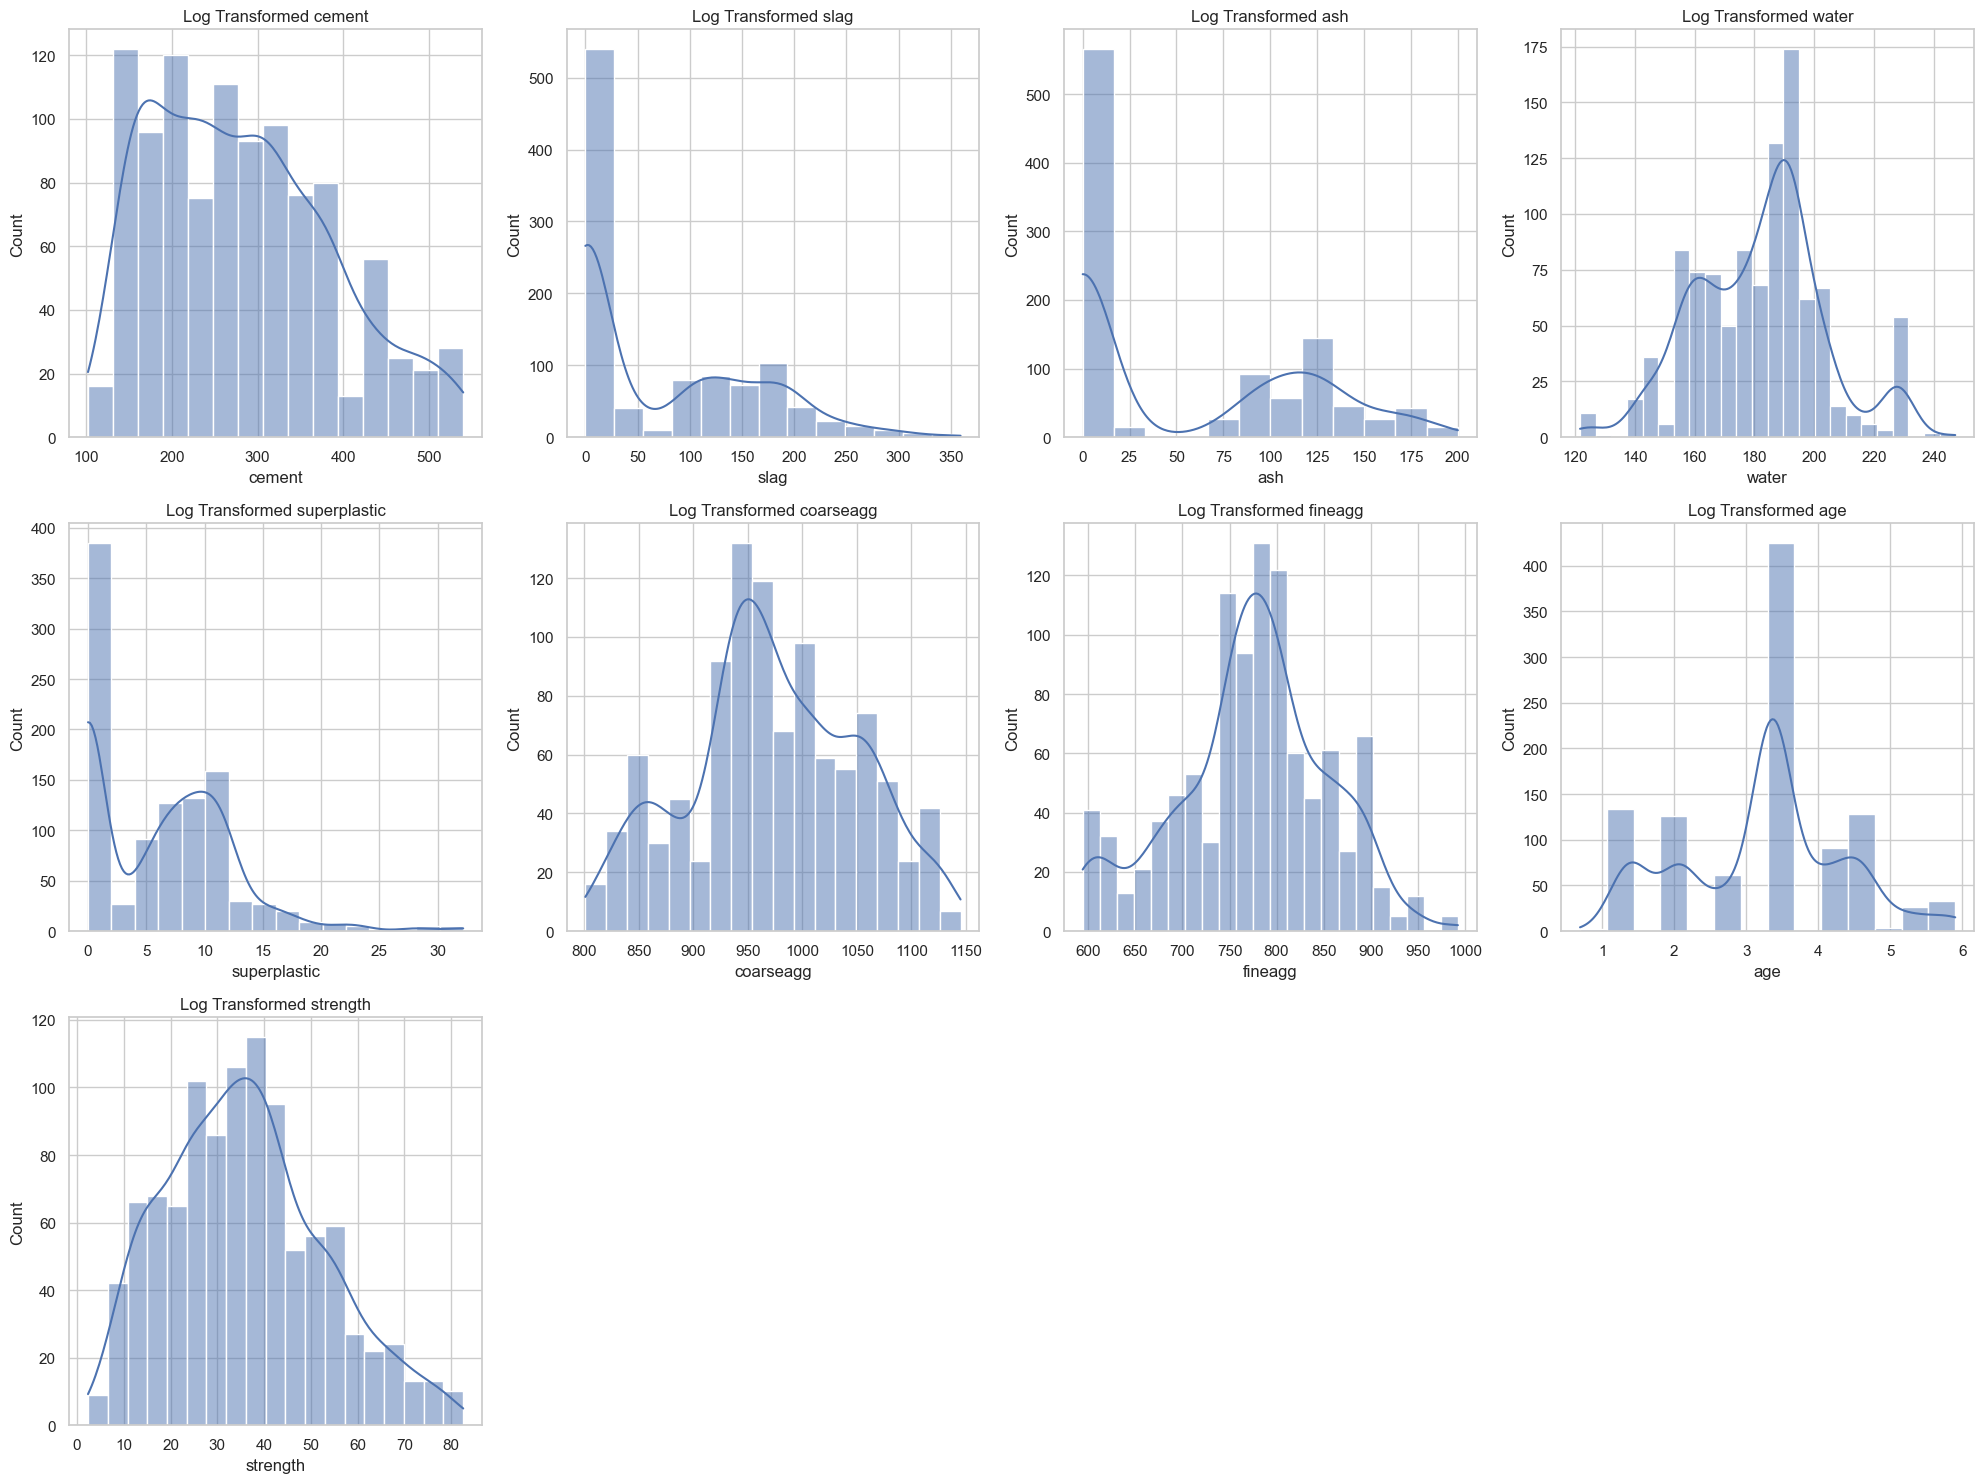

In [88]:
log_transformed_data = df.copy()
for column in df.columns:
    if skewness[column] > 1 and (df[column] > 0).all():
        log_transformed_data[column] = np.log1p(df[column])  
plt.figure(figsize=(20, 15))
for i, column in enumerate(log_transformed_data.columns):
    plt.subplot(3, 4, i+1)
    sns.histplot(log_transformed_data[column], kde=True)
    plt.title(f'Log Transformed {column}')
plt.tight_layout()
plt.show()

## Square Root Transformation (for moderate skew)
Square root transformation can be applied to features that have moderate positive skew.

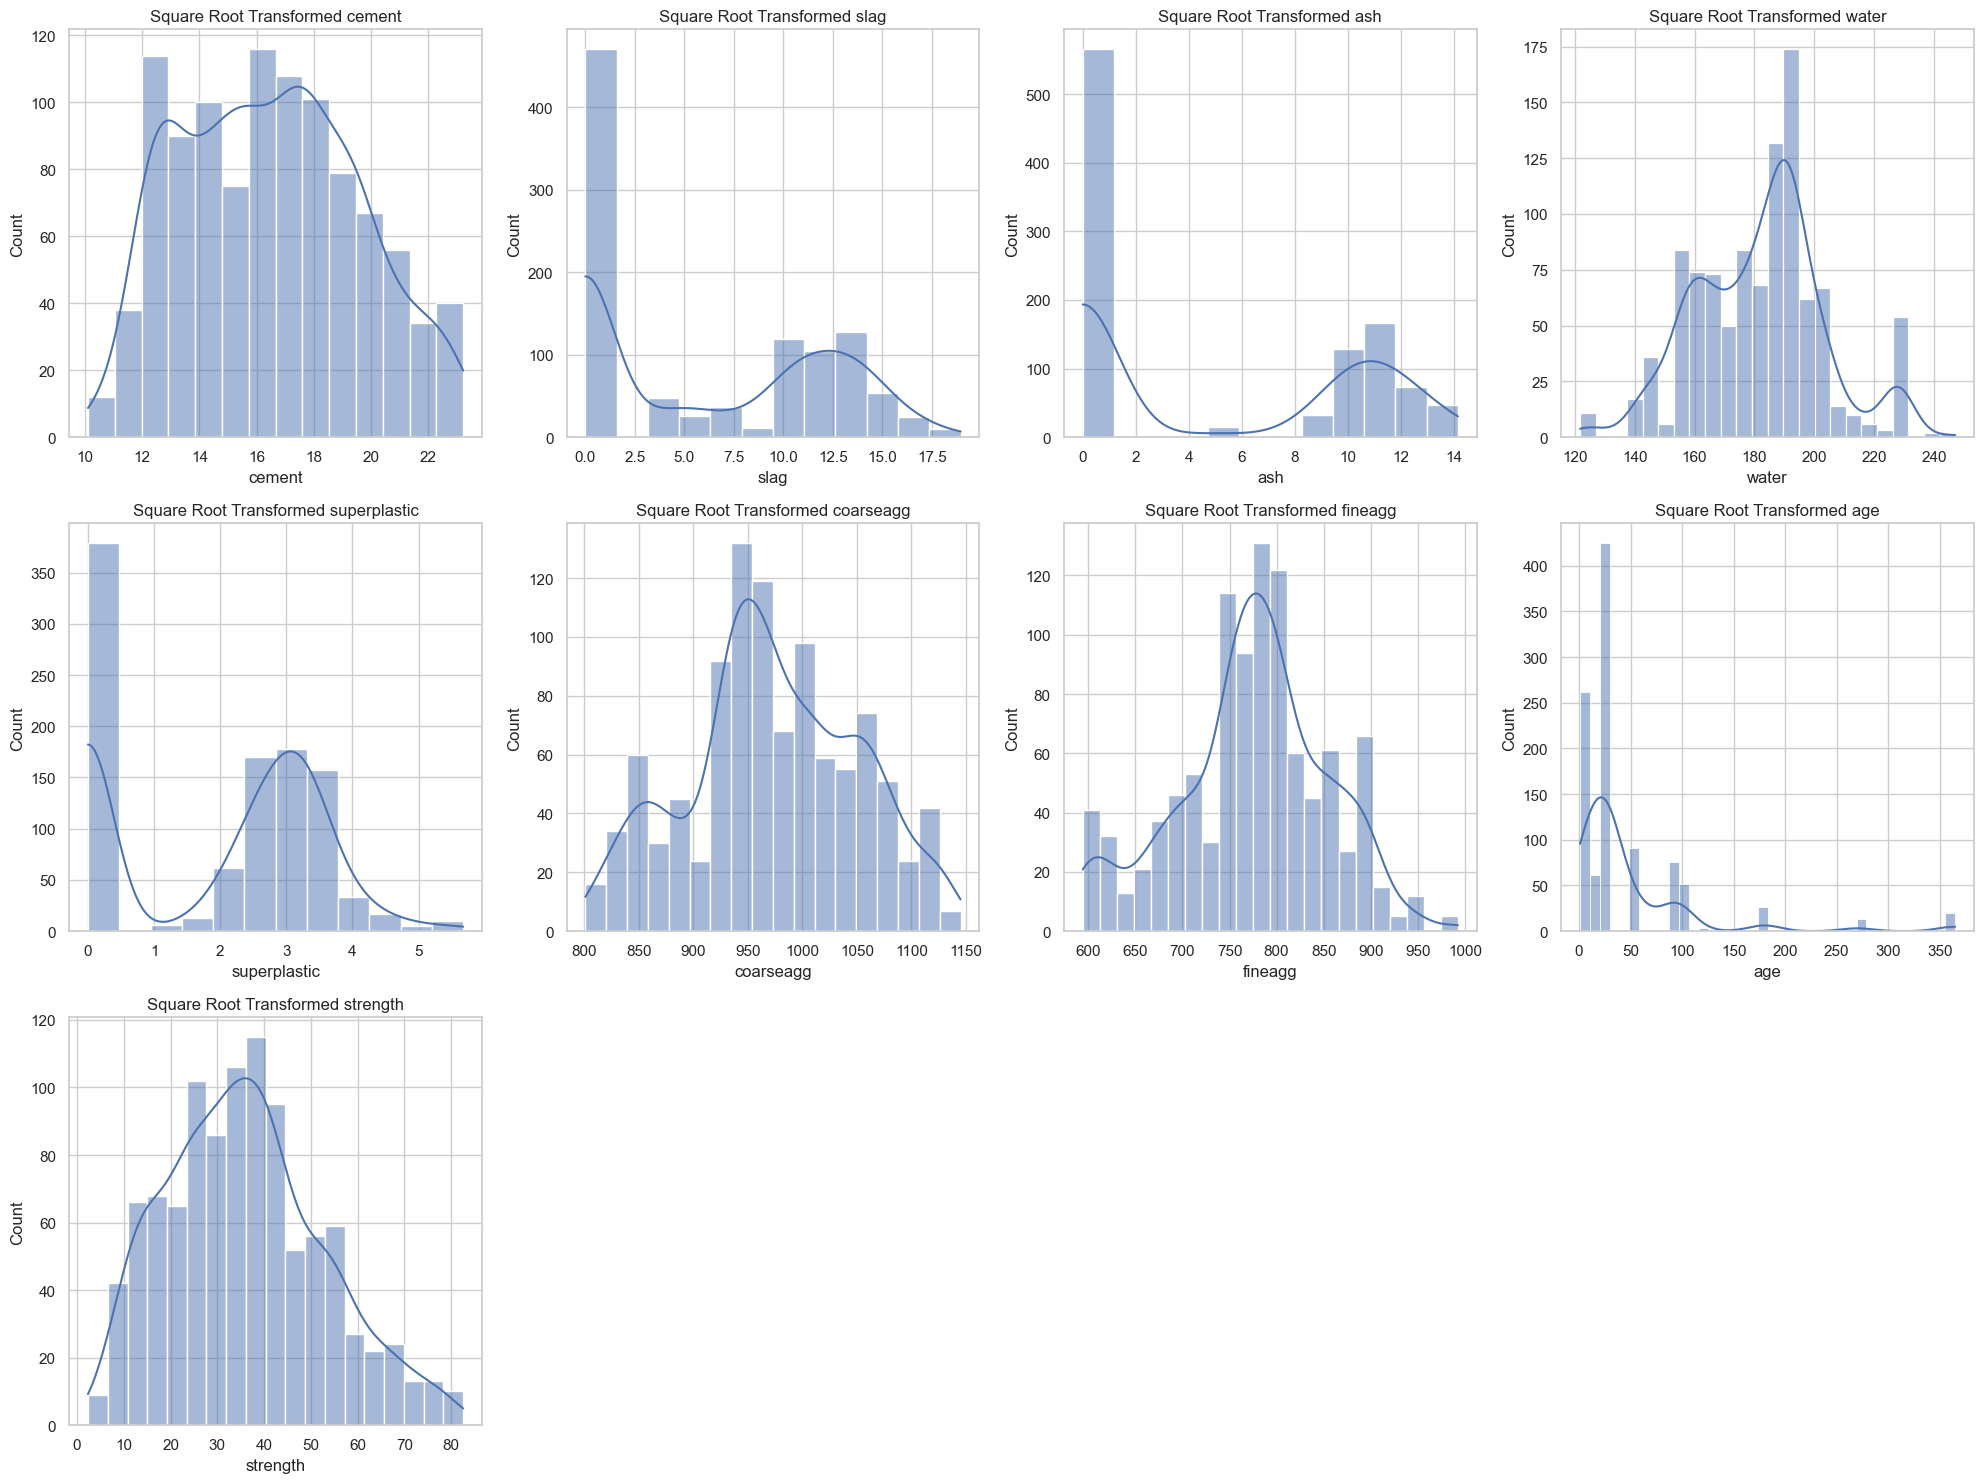

In [89]:
sqrt_transformed_data = df.copy()
for column in df.columns:
    if 0.5 < skewness[column] <= 1:
        sqrt_transformed_data[column] = np.sqrt(df[column])
plt.figure(figsize=(20, 15))
for i, column in enumerate(sqrt_transformed_data.columns):
    plt.subplot(3, 4, i+1)
    sns.histplot(sqrt_transformed_data[column], kde=True)
    plt.title(f'Square Root Transformed {column}')
plt.tight_layout()
plt.show()

## Recalculate Skewness and Kurtosis After Transformation

After applying transformations, it's important to check the skewness and kurtosis again to see if the transformation has been effective.

In [35]:
skewness_transformed = log_transformed_data.apply(skew)
kurt_transformed = log_transformed_data.apply(kurtosis)
print(f"Skewness after transformation:\n{skewness_transformed}")
print(f"Kurtosis after transformation:\n{kurt_transformed}")

Skewness after transformation:
cement          0.564115
slag            0.853948
ash             0.496489
water           0.034382
superplastic    0.979140
coarseagg      -0.065159
fineagg        -0.251976
age             0.005705
strength        0.395105
dtype: float64
Kurtosis after transformation:
cement         -0.436274
slag           -0.411121
ash            -1.365868
water           0.160533
superplastic    1.681009
coarseagg      -0.586116
fineagg        -0.111319
age            -0.332850
strength       -0.309756
dtype: float64


# 8. Feature engineering

## ○ Create new features

Creating new features involves combining existing features or deriving new ones that might provide additional value to the model.

## Interaction Features:

You can create new features that capture interactions between existing features.

In [33]:
df['cement_to_water'] = df['cement'] / df['water']
df['cement_to_age'] = df['cement'] / df['age']
df['water_to_age'] = df['water'] / df['age']
print(df[['cement', 'water', 'age', 'cement_to_water', 'cement_to_age', 'water_to_age']].head())

   cement  water  age  cement_to_water  cement_to_age  water_to_age
0   141.3  203.5   28         0.694349       5.046429      7.267857
1   168.9  158.3   14         1.066961      12.064286     11.307143
2   250.0  187.4   28         1.334045       8.928571      6.692857
3   266.0  228.0   28         1.166667       9.500000      8.142857
4   154.8  193.3   28         0.800828       5.528571      6.903571


## Polynomial Features:

You can create polynomial features by raising existing features to higher powers or taking their combinations.

In [34]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(df[['cement', 'water', 'age']])
poly_df = pd.DataFrame(poly_features, columns=poly.get_feature_names_out(['cement', 'water', 'age']))
data = pd.concat([df, poly_df], axis=1)
print(data.head())

   cement   slag    ash  water  superplastic  coarseagg  fineagg   age  \
0   141.3  212.0    0.0  203.5           0.0      971.8    748.5  28.0   
1   168.9   42.2  124.3  158.3          10.8     1080.8    796.2  14.0   
2   250.0    0.0   95.7  187.4           5.5      956.9    861.2  28.0   
3   266.0  114.0    0.0  228.0           0.0      932.0    670.0  28.0   
4   154.8  183.4    0.0  193.3           9.1     1047.4    696.7  28.0   

   strength  cement_to_water  ...  water_to_age  cement  water   age  \
0     29.89         0.694349  ...      7.267857   141.3  203.5  28.0   
1     23.51         1.066961  ...     11.307143   168.9  158.3  14.0   
2     29.22         1.334045  ...      6.692857   250.0  187.4  28.0   
3     45.85         1.166667  ...      8.142857   266.0  228.0  28.0   
4     18.29         0.800828  ...      6.903571   154.8  193.3  28.0   

   cement^2  cement water  cement age   water^2  water age  age^2  
0  19965.69      28754.55      3956.4  41412.25     56

## ○ One-hot encoding (for categorical)

Machine learning models generally require numerical input, so categorical variables need to be encoded. One of the most common encoding techniques is One-Hot Encoding, which converts each categorical value into a new column.

## One-Hot Encoding with Pandas

In [36]:
data_encoded = pd.get_dummies(df, drop_first=True)  
print(data_encoded.head())

   cement   slag    ash  water  superplastic  coarseagg  fineagg  age  \
0   141.3  212.0    0.0  203.5           0.0      971.8    748.5   28   
1   168.9   42.2  124.3  158.3          10.8     1080.8    796.2   14   
2   250.0    0.0   95.7  187.4           5.5      956.9    861.2   28   
3   266.0  114.0    0.0  228.0           0.0      932.0    670.0   28   
4   154.8  183.4    0.0  193.3           9.1     1047.4    696.7   28   

   strength  cement_to_water  cement_to_age  water_to_age  
0     29.89         0.694349       5.046429      7.267857  
1     23.51         1.066961      12.064286     11.307143  
2     29.22         1.334045       8.928571      6.692857  
3     45.85         1.166667       9.500000      8.142857  
4     18.29         0.800828       5.528571      6.903571  


## One-Hot Encoding for Multiple Columns

In [37]:
categorical_columns = df.select_dtypes(include=['object']).columns
data_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)
print(data_encoded.head())

   cement   slag    ash  water  superplastic  coarseagg  fineagg  age  \
0   141.3  212.0    0.0  203.5           0.0      971.8    748.5   28   
1   168.9   42.2  124.3  158.3          10.8     1080.8    796.2   14   
2   250.0    0.0   95.7  187.4           5.5      956.9    861.2   28   
3   266.0  114.0    0.0  228.0           0.0      932.0    670.0   28   
4   154.8  183.4    0.0  193.3           9.1     1047.4    696.7   28   

   strength  cement_to_water  cement_to_age  water_to_age  
0     29.89         0.694349       5.046429      7.267857  
1     23.51         1.066961      12.064286     11.307143  
2     29.22         1.334045       8.928571      6.692857  
3     45.85         1.166667       9.500000      8.142857  
4     18.29         0.800828       5.528571      6.903571  


# 9. Split data into train/test sets

You can split the data into features (X) and target (y). The target is the variable you want to predict, and the features are the input variables.

In [41]:
X = df.drop('strength', axis=1)  
y = df['strength']  

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")

Training data shape: (804, 11)
Testing data shape: (201, 11)


In [51]:
print(y.value_counts())
df = df[df['strength'] != 'TheClassWithSingleSample']
X = df.drop('strength', axis=1)
y = df['strength']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

strength
23.52    4
31.35    4
33.40    4
41.05    4
40.86    3
        ..
54.32    1
26.32    1
42.70    1
17.34    1
52.61    1
Name: count, Length: 845, dtype: int64


# 10. Train Linear Regression model

To train a Linear Regression model using the training data, we can use the LinearRegression class from scikit-learn.

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [44]:
model = LinearRegression()

In [45]:
model.fit(X_train, y_train)

LinearRegression()

In [46]:
y_pred = model.predict(X_test)

In [47]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 67.67588276296425


In [48]:
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

R-squared: 0.7507831372139566


# 11. Feature Scaling

Feature scaling is an essential step when training machine learning models, especially when features have different units or scales. Feature scaling helps ensure that the model treats all features equally, preventing models that are sensitive to scale (such as linear regression) from being biased toward features with larger scales.

## Standardization (Z-score Normalization)

Standardization transforms the data so that it has a mean of 0 and a standard deviation of 1.

In [49]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print(X_train_scaled[:5]) 

[[-0.54253406 -0.21305146  1.03518661 -1.93160005  0.99039876  1.29835157
   0.24609504 -0.67757675  0.02471471  1.30696642  1.60091463]
 [-0.1869058   0.29736953  0.30979429  0.33023294 -0.01575967 -0.71635903
  -0.30712164 -0.27966596 -0.29232985 -0.36834968 -0.39655817]
 [ 1.98745176 -0.84073133 -0.88369307  0.47101093 -1.03897163 -0.49521658
  -0.77298832 -0.27966596  1.52729844 -0.15676446 -0.39123221]
 [-0.41110623 -0.84073133  1.00108697 -0.37365699  0.10361506  1.05020916
   0.06633127 -0.67757675 -0.31924563  1.42633183  2.15102742]
 [ 0.34460382 -0.84073133 -0.88369307  0.47101093 -1.03897163 -0.06064594
   0.97147984 -0.27966596  0.12728271 -0.31662885 -0.39123221]]


## Min-Max Scaling

Min-Max scaling transforms the data to a fixed range, typically [0, 1].

In [50]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print(X_train_scaled[:5]) 

[[0.2652968  0.15191987 0.61869065 0.1518785  0.36956522 0.79854651
  0.49849473 0.00549451 0.31672887 0.14457609 0.23263789]
 [0.34931507 0.2754591  0.3848076  0.53717026 0.1863354  0.34302326
  0.38886101 0.07417582 0.25437316 0.01719109 0.03118862]
 [0.8630137  0.         0.         0.56115108 0.         0.39302326
  0.29653788 0.07417582 0.61225413 0.03327927 0.03172576]
 [0.29634703 0.         0.60769615 0.41726619 0.20807453 0.74244186
  0.46287005 0.00549451 0.24907941 0.1536522  0.2881179 ]
 [0.47488584 0.         0.         0.56115108 0.         0.49127907
  0.64224787 0.07417582 0.33690174 0.02112375 0.03172576]]


In [51]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)
y_pred_scaled = model.predict(X_test_scaled)
mse_scaled = mean_squared_error(y_test, y_pred_scaled)
r2_scaled = r2_score(y_test, y_pred_scaled)
print(f"Mean Squared Error (scaled): {mse_scaled}")
print(f"R-squared (scaled): {r2_scaled}")

Mean Squared Error (scaled): 67.6758827629643
R-squared (scaled): 0.7507831372139563


# 12. Prediction using the algorithm

Once the model is trained, use the predict() method to make predictions on the test data (X_test_scaled):

In [52]:
y_pred_scaled = model.predict(X_test_scaled)
print("Predicted values: ", y_pred_scaled[:5])

Predicted values:  [48.00508888 34.29941984 38.25680988 33.50710681 22.29657811]


## Evaluate the Predictions

After making predictions, it's crucial to evaluate how well the model performs by comparing the predicted values (y_pred_scaled) with the actual values (y_test). Common evaluation metrics for regression tasks include Mean Squared Error (MSE) and R-squared (R²).

In [53]:
from sklearn.metrics import mean_squared_error, r2_score
mse_scaled = mean_squared_error(y_test, y_pred_scaled)
print(f"Mean Squared Error (scaled): {mse_scaled}")
r2_scaled = r2_score(y_test, y_pred_scaled)
print(f"R-squared (scaled): {r2_scaled}")

Mean Squared Error (scaled): 67.6758827629643
R-squared (scaled): 0.7507831372139563


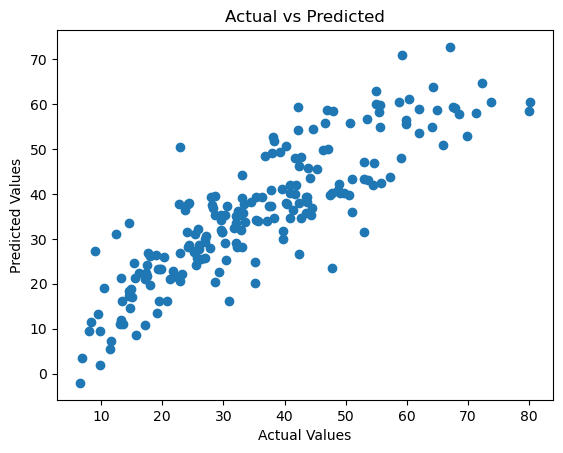

In [54]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred_scaled)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted')
plt.show()

# 13. Visualise the Predicted and Actual

Visualizing the relationship between the predicted and actual values is an effective way to assess the performance of a regression model. One common approach is to use a scatter plot to show how closely the predicted values align with the actual values. Ideally, the points should be as close to a 45-degree line as possible, which would indicate that the predictions are accurate.

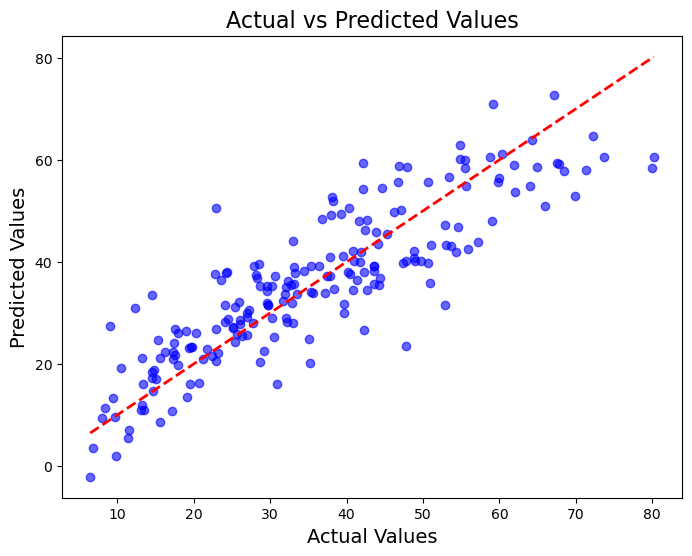

In [55]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_scaled, color='blue', alpha=0.6)
plt.title('Actual vs Predicted Values', fontsize=16)
plt.xlabel('Actual Values', fontsize=14)
plt.ylabel('Predicted Values', fontsize=14)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)
plt.show()

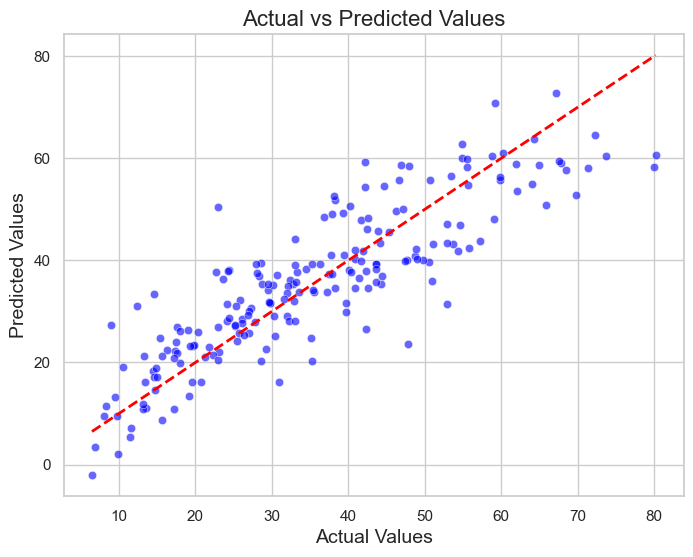

In [56]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_scaled, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)
plt.title('Actual vs Predicted Values', fontsize=16)
plt.xlabel('Actual Values', fontsize=14)
plt.ylabel('Predicted Values', fontsize=14)
plt.show()

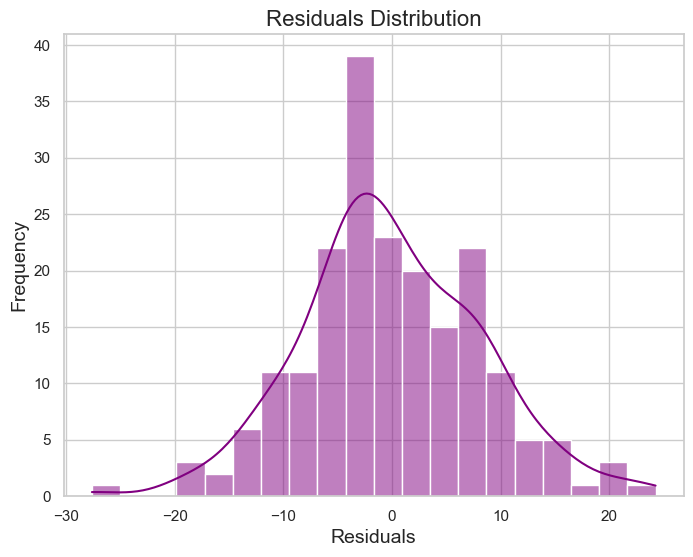

In [66]:
residuals = y_test - y_pred_scaled
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, color='purple', bins=20)
plt.title('Residuals Distribution', fontsize=16)
plt.xlabel('Residuals', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

# 14. Print the difference between Actual and Predicted

In [57]:
residuals = y_test - y_pred_scaled
print("Residuals (Actual - Predicted):")
print(residuals.head()) 

Residuals (Actual - Predicted):
949    -6.335089
644    -4.749420
696    -3.766810
523   -18.967107
367    -4.956578
Name: strength, dtype: float64


In [58]:
print("All Residuals (Actual - Predicted):")
print(residuals)

All Residuals (Actual - Predicted):
949    -6.335089
644    -4.749420
696    -3.766810
523   -18.967107
367    -4.956578
         ...    
208     3.479525
795     1.225624
336     9.601580
210    -3.965510
352     0.477951
Name: strength, Length: 201, dtype: float64


In [59]:
import pandas as pd
comparison_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred_scaled,
    'Residual': residuals
})
print(comparison_df.head())  

     Actual  Predicted   Residual
949   41.67  48.005089  -6.335089
644   29.55  34.299420  -4.749420
696   34.49  38.256810  -3.766810
523   14.54  33.507107 -18.967107
367   17.34  22.296578  -4.956578


# 15. Evaluate model performance

Evaluating the performance of a regression model is essential to understanding how well it predicts the target variable. Several metrics can be used to assess model performance, including:

1.MAE (Mean Absolute Error)

2.MSE (Mean Squared Error)

3.RMSE (Root Mean Squared Error)

4.R² Score (R Squared)

5.Adjusted R²


In [63]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
mae = mean_absolute_error(y_test, y_pred_scaled)
mse = mean_squared_error(y_test, y_pred_scaled)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_scaled)
n = X_test.shape[0]  
p = X_test.shape[1]  
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")
print(f"Adjusted R-squared: {adj_r2}")

Mean Absolute Error (MAE): 6.453826077807438
Mean Squared Error (MSE): 67.6758827629643
Root Mean Squared Error (RMSE): 8.22653528303163
R-squared (R²): 0.7507831372139563
Adjusted R-squared: 0.7362784520782606


# 16. Perform the same steps for

1.Decision Tree Regressor

2.Random Forest Regressor

3.Support Vector Machine (SVM) Regressor

4.K Nearest Neighbors (KNN) Regressor


In [64]:
from sklearn.tree import DecisionTreeRegressor
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error
dt_regressor = DecisionTreeRegressor(random_state=42)
dt_regressor.fit(X_train, y_train)
y_pred_dt = dt_regressor.predict(X_test)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)
r2_dt = r2_score(y_test, y_pred_dt)
n = X_test.shape[0] 
p = X_test.shape[1] 
adj_r2_dt = 1 - (1 - r2_dt) * (n - 1) / (n - p - 1)
print(f"Decision Tree Regressor Metrics:")
print(f"MAE: {mae_dt}")
print(f"MSE: {mse_dt}")
print(f"RMSE: {rmse_dt}")
print(f"R²: {r2_dt}")
print(f"Adjusted R²: {adj_r2_dt}")

Decision Tree Regressor Metrics:
MAE: 4.328416252072969
MSE: 43.4849975262576
RMSE: 6.594315546457994
R²: 0.8398662238406227
Adjusted R²: 0.8305462686144156


In [65]:
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor(random_state=42)
rf_regressor.fit(X_train, y_train)
y_pred_rf = rf_regressor.predict(X_test)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)
adj_r2_rf = 1 - (1 - r2_rf) * (n - 1) / (n - p - 1)
print(f"Random Forest Regressor Metrics:")
print(f"MAE: {mae_rf}")
print(f"MSE: {mse_rf}")
print(f"RMSE: {rmse_rf}")
print(f"R²: {r2_rf}")
print(f"Adjusted R²: {adj_r2_rf}")

Random Forest Regressor Metrics:
MAE: 3.6477406147832268
MSE: 27.866797523062257
RMSE: 5.278901166252524
R²: 0.8973803433208845
Adjusted R²: 0.8914077707099306


In [66]:
from sklearn.svm import SVR
svm_regressor = SVR()
svm_regressor.fit(X_train, y_train)
y_pred_svm = svm_regressor.predict(X_test)
mae_svm = mean_absolute_error(y_test, y_pred_svm)
mse_svm = mean_squared_error(y_test, y_pred_svm)
rmse_svm = np.sqrt(mse_svm)
r2_svm = r2_score(y_test, y_pred_svm)
adj_r2_svm = 1 - (1 - r2_svm) * (n - 1) / (n - p - 1)
print(f"Support Vector Machine Regressor Metrics:")
print(f"MAE: {mae_svm}")
print(f"MSE: {mse_svm}")
print(f"RMSE: {rmse_svm}")
print(f"R²: {r2_svm}")
print(f"Adjusted R²: {adj_r2_svm}")

Support Vector Machine Regressor Metrics:
MAE: 11.523068785393313
MSE: 199.6044396714903
RMSE: 14.128143532378566
R²: 0.26495539884826125
Adjusted R²: 0.22217502523625532


In [67]:
from sklearn.neighbors import KNeighborsRegressor
knn_regressor = KNeighborsRegressor()
knn_regressor.fit(X_train, y_train)
y_pred_knn = knn_regressor.predict(X_test)
mae_knn = mean_absolute_error(y_test, y_pred_knn)
mse_knn = mean_squared_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mse_knn)
r2_knn = r2_score(y_test, y_pred_knn)
adj_r2_knn = 1 - (1 - r2_knn) * (n - 1) / (n - p - 1)
print(f"K Nearest Neighbors Regressor Metrics:")
print(f"MAE: {mae_knn}")
print(f"MSE: {mse_knn}")
print(f"RMSE: {rmse_knn}")
print(f"R²: {r2_knn}")
print(f"Adjusted R²: {adj_r2_knn}")

K Nearest Neighbors Regressor Metrics:
MAE: 5.1311343283582085
MSE: 51.903351383084576
RMSE: 7.204398058344957
R²: 0.8088655829569349
Adjusted R²: 0.7977413576263861


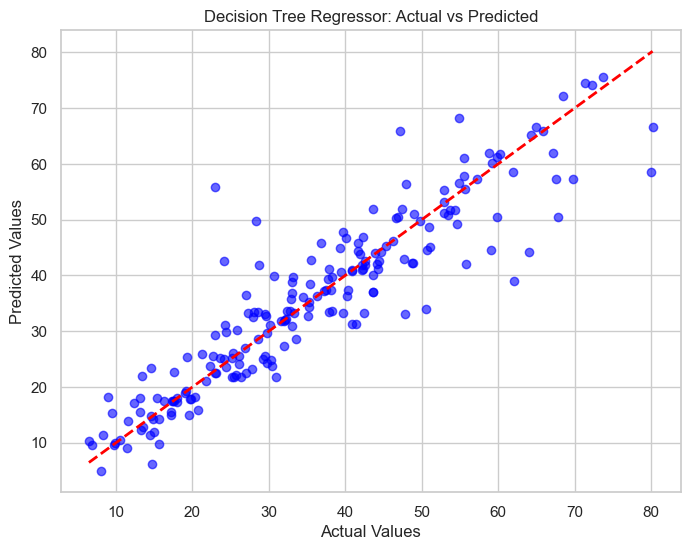

In [68]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_dt, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)
plt.title('Decision Tree Regressor: Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()


Decision Tree Regressor Metrics:
MAE: 4.328416252072969
MSE: 43.4849975262576
RMSE: 6.594315546457994
R²: 0.8398662238406227
Adjusted R²: 0.8305462686144156


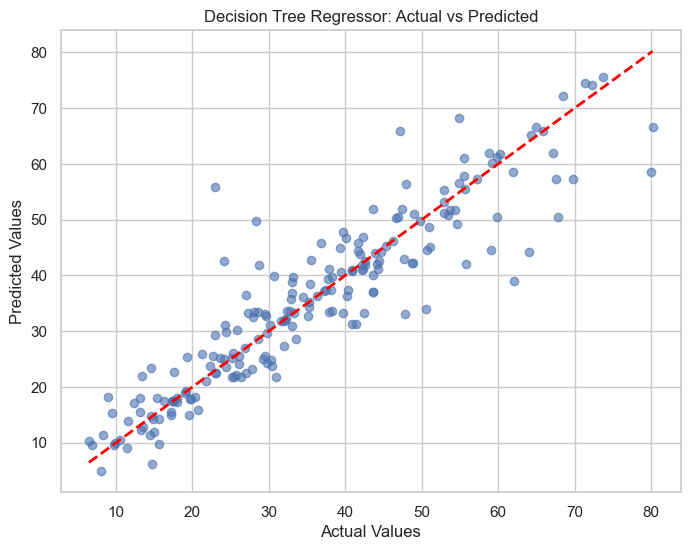


Random Forest Regressor Metrics:
MAE: 3.6477406147832268
MSE: 27.866797523062257
RMSE: 5.278901166252524
R²: 0.8973803433208845
Adjusted R²: 0.8914077707099306


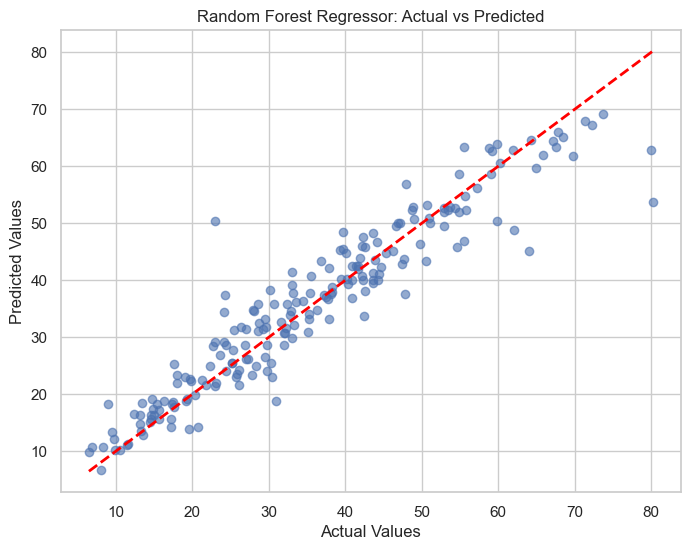


SVM Regressor Metrics:
MAE: 11.523068785393313
MSE: 199.6044396714903
RMSE: 14.128143532378566
R²: 0.26495539884826125
Adjusted R²: 0.22217502523625532


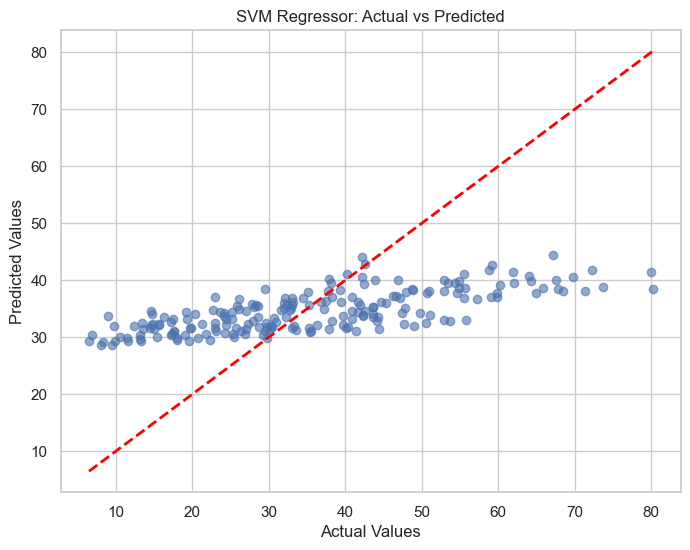


KNN Regressor Metrics:
MAE: 5.1311343283582085
MSE: 51.903351383084576
RMSE: 7.204398058344957
R²: 0.8088655829569349
Adjusted R²: 0.7977413576263861


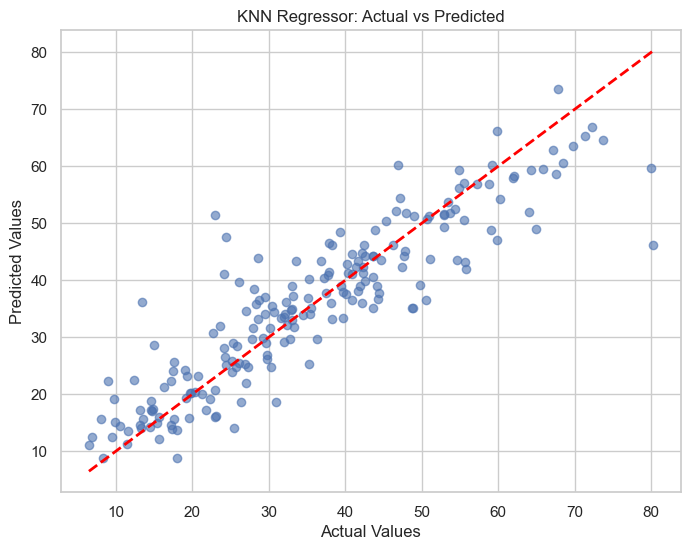

In [69]:
models = {
    'Decision Tree Regressor': DecisionTreeRegressor(random_state=42),
    'Random Forest Regressor': RandomForestRegressor(random_state=42),
    'SVM Regressor': SVR(),
    'KNN Regressor': KNeighborsRegressor()
}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    print(f"\n{model_name} Metrics:")
    print(f"MAE: {mae}")
    print(f"MSE: {mse}")
    print(f"RMSE: {rmse}")
    print(f"R²: {r2}")
    print(f"Adjusted R²: {adj_r2}")
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, alpha=0.6)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)
    plt.title(f'{model_name}: Actual vs Predicted')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.show()

# 17. Perform the Cross Validation using Cross_val_score for all the algorithms

Cross-validation is a technique used to evaluate the performance of a machine learning model by training it on different subsets of the data and testing it on the remaining data. This helps ensure that the model generalizes well to unseen data, rather than just performing well on the training data.


In [70]:
from sklearn.model_selection import cross_val_score
import numpy as np
def evaluate_model_with_cv(model, X, y, cv=5):
    neg_mse_scores = cross_val_score(model, X, y, cv=cv, scoring='neg_mean_squared_error')
    mse_scores = -neg_mse_scores  
    rmse_scores = np.sqrt(mse_scores)
    r2_scores = cross_val_score(model, X, y, cv=cv, scoring='r2')
    neg_mae_scores = cross_val_score(model, X, y, cv=cv, scoring='neg_mean_absolute_error')
    mae_scores = -neg_mae_scores
    print(f"\nCross Validation Metrics for {model.__class__.__name__}:")
    print(f"MAE: {mae_scores.mean()} ± {mae_scores.std()}")
    print(f"MSE: {mse_scores.mean()} ± {mse_scores.std()}")
    print(f"RMSE: {rmse_scores.mean()} ± {rmse_scores.std()}")
    print(f"R²: {r2_scores.mean()} ± {r2_scores.std()}")
    return mse_scores, rmse_scores, r2_scores, mae_scores

models = {
    'Decision Tree Regressor': DecisionTreeRegressor(random_state=42),
    'Random Forest Regressor': RandomForestRegressor(random_state=42),
    'SVM Regressor': SVR(),
    'KNN Regressor': KNeighborsRegressor()
}

for model_name, model in models.items():
    evaluate_model_with_cv(model, X, y, cv=5)  


Cross Validation Metrics for DecisionTreeRegressor:
MAE: 4.4332172470978435 ± 0.5305016663162821
MSE: 46.74618040906578 ± 11.152320914961283
RMSE: 6.78560572615609 ± 0.8376964475413832
R²: 0.8212368246227351 ± 0.04132776770795856

Cross Validation Metrics for RandomForestRegressor:
MAE: 3.7871862448866778 ± 0.31153800710852425
MSE: 29.190413810852743 ± 7.273237778647847
RMSE: 5.36152159029257 ± 0.6667083677886315
R²: 0.888593518082548 ± 0.023255075380288946

Cross Validation Metrics for SVR:
MAE: 11.25834424695231 ± 0.5161629771648638
MSE: 198.2183228991372 ± 19.77740816973494
RMSE: 14.061315568630462 ± 0.7054979649352617
R²: 0.24035877135087497 ± 0.02624808476785281

Cross Validation Metrics for KNeighborsRegressor:
MAE: 5.473890547263681 ± 0.4312256108779283
MSE: 54.663815832835816 ± 12.194630135007364
RMSE: 7.34810235365084 ± 0.8180511188836634
R²: 0.7912568650531753 ± 0.03595761218138504


# 18.Conclusion Summary:

The Random Forest Regressor is the most suitable model for this dataset based on performance metrics such as MAE, RMSE, and R². It provides the best balance of accuracy and generalizability, though Decision Trees, SVM, and KNN may also serve as viable alternatives depending on the specific needs for accuracy vs interpretability.

This analysis highlights the importance of cross-validation and proper model selection in building robust predictive models.